In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz
import warnings
warnings.filterwarnings('ignore')


## 1.Business Case

By considering the various factors in a patient record,predict whether a patient has normally functioning liver or not.

In [124]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [125]:
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [126]:
data=data.set_axis(['age','gender','tot_bilirubin','direct_bilirubin','alk_phos','alamine_aminotransferase','aspartate_aminotransferase','tot_proteins','albumin','ag_ratio','target'],axis=1)

In [127]:
data

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Doing some basic checks

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         582 non-null    int64  
 1   gender                      582 non-null    object 
 2   tot_bilirubin               582 non-null    float64
 3   direct_bilirubin            582 non-null    float64
 4   alk_phos                    582 non-null    int64  
 5   alamine_aminotransferase    582 non-null    int64  
 6   aspartate_aminotransferase  582 non-null    int64  
 7   tot_proteins                582 non-null    float64
 8   albumin                     582 non-null    float64
 9   ag_ratio                    578 non-null    float64
 10  target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [129]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [130]:
#Checking if there are any missing values in the dataset

data.isnull().sum()

age                           0
gender                        0
tot_bilirubin                 0
direct_bilirubin              0
alk_phos                      0
alamine_aminotransferase      0
aspartate_aminotransferase    0
tot_proteins                  0
albumin                       0
ag_ratio                      4
target                        0
dtype: int64

As we can see,there are 4 missing values in ag_ratio column

## 2.Domain analysis

* age:Age of the patient <br />
<br />
* gender:Gender of the patient <br />
<br />
* tot_bilirubin:Total Bilirubin 
                The normal range of total bilirubin is 0-4.
<br />
* direct_bilirubin:Anything less than 0.3mg/dl is the normal range of direct bilirubin.<br />
<br />
* alk_phos:Alkaline_Phosphate
           The normal range is 40 to 130 U/L
<br />
* alamine_aminotransferase:Anything less than 56 U/L is the ideal range of Alamine Aminotransferase<br />
<br />
* aspartate_aminotransferase:The normal level of AST is 5-40 units.<br />
<br />
* tot_proteins:Total_Proteins:The general range is 6.0 to 8.3<br />
<br />
* albunim:3.4 to 5.4 is the ideal level of albunim<br />
<br />
* ag_ratio:In general the 0.8 to 2.0 is considered as the normal level for A/G ratio.

               

### 3.Exploratory Data Analysis

In [131]:
#Sweet viz report gives a quick overview about the data
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


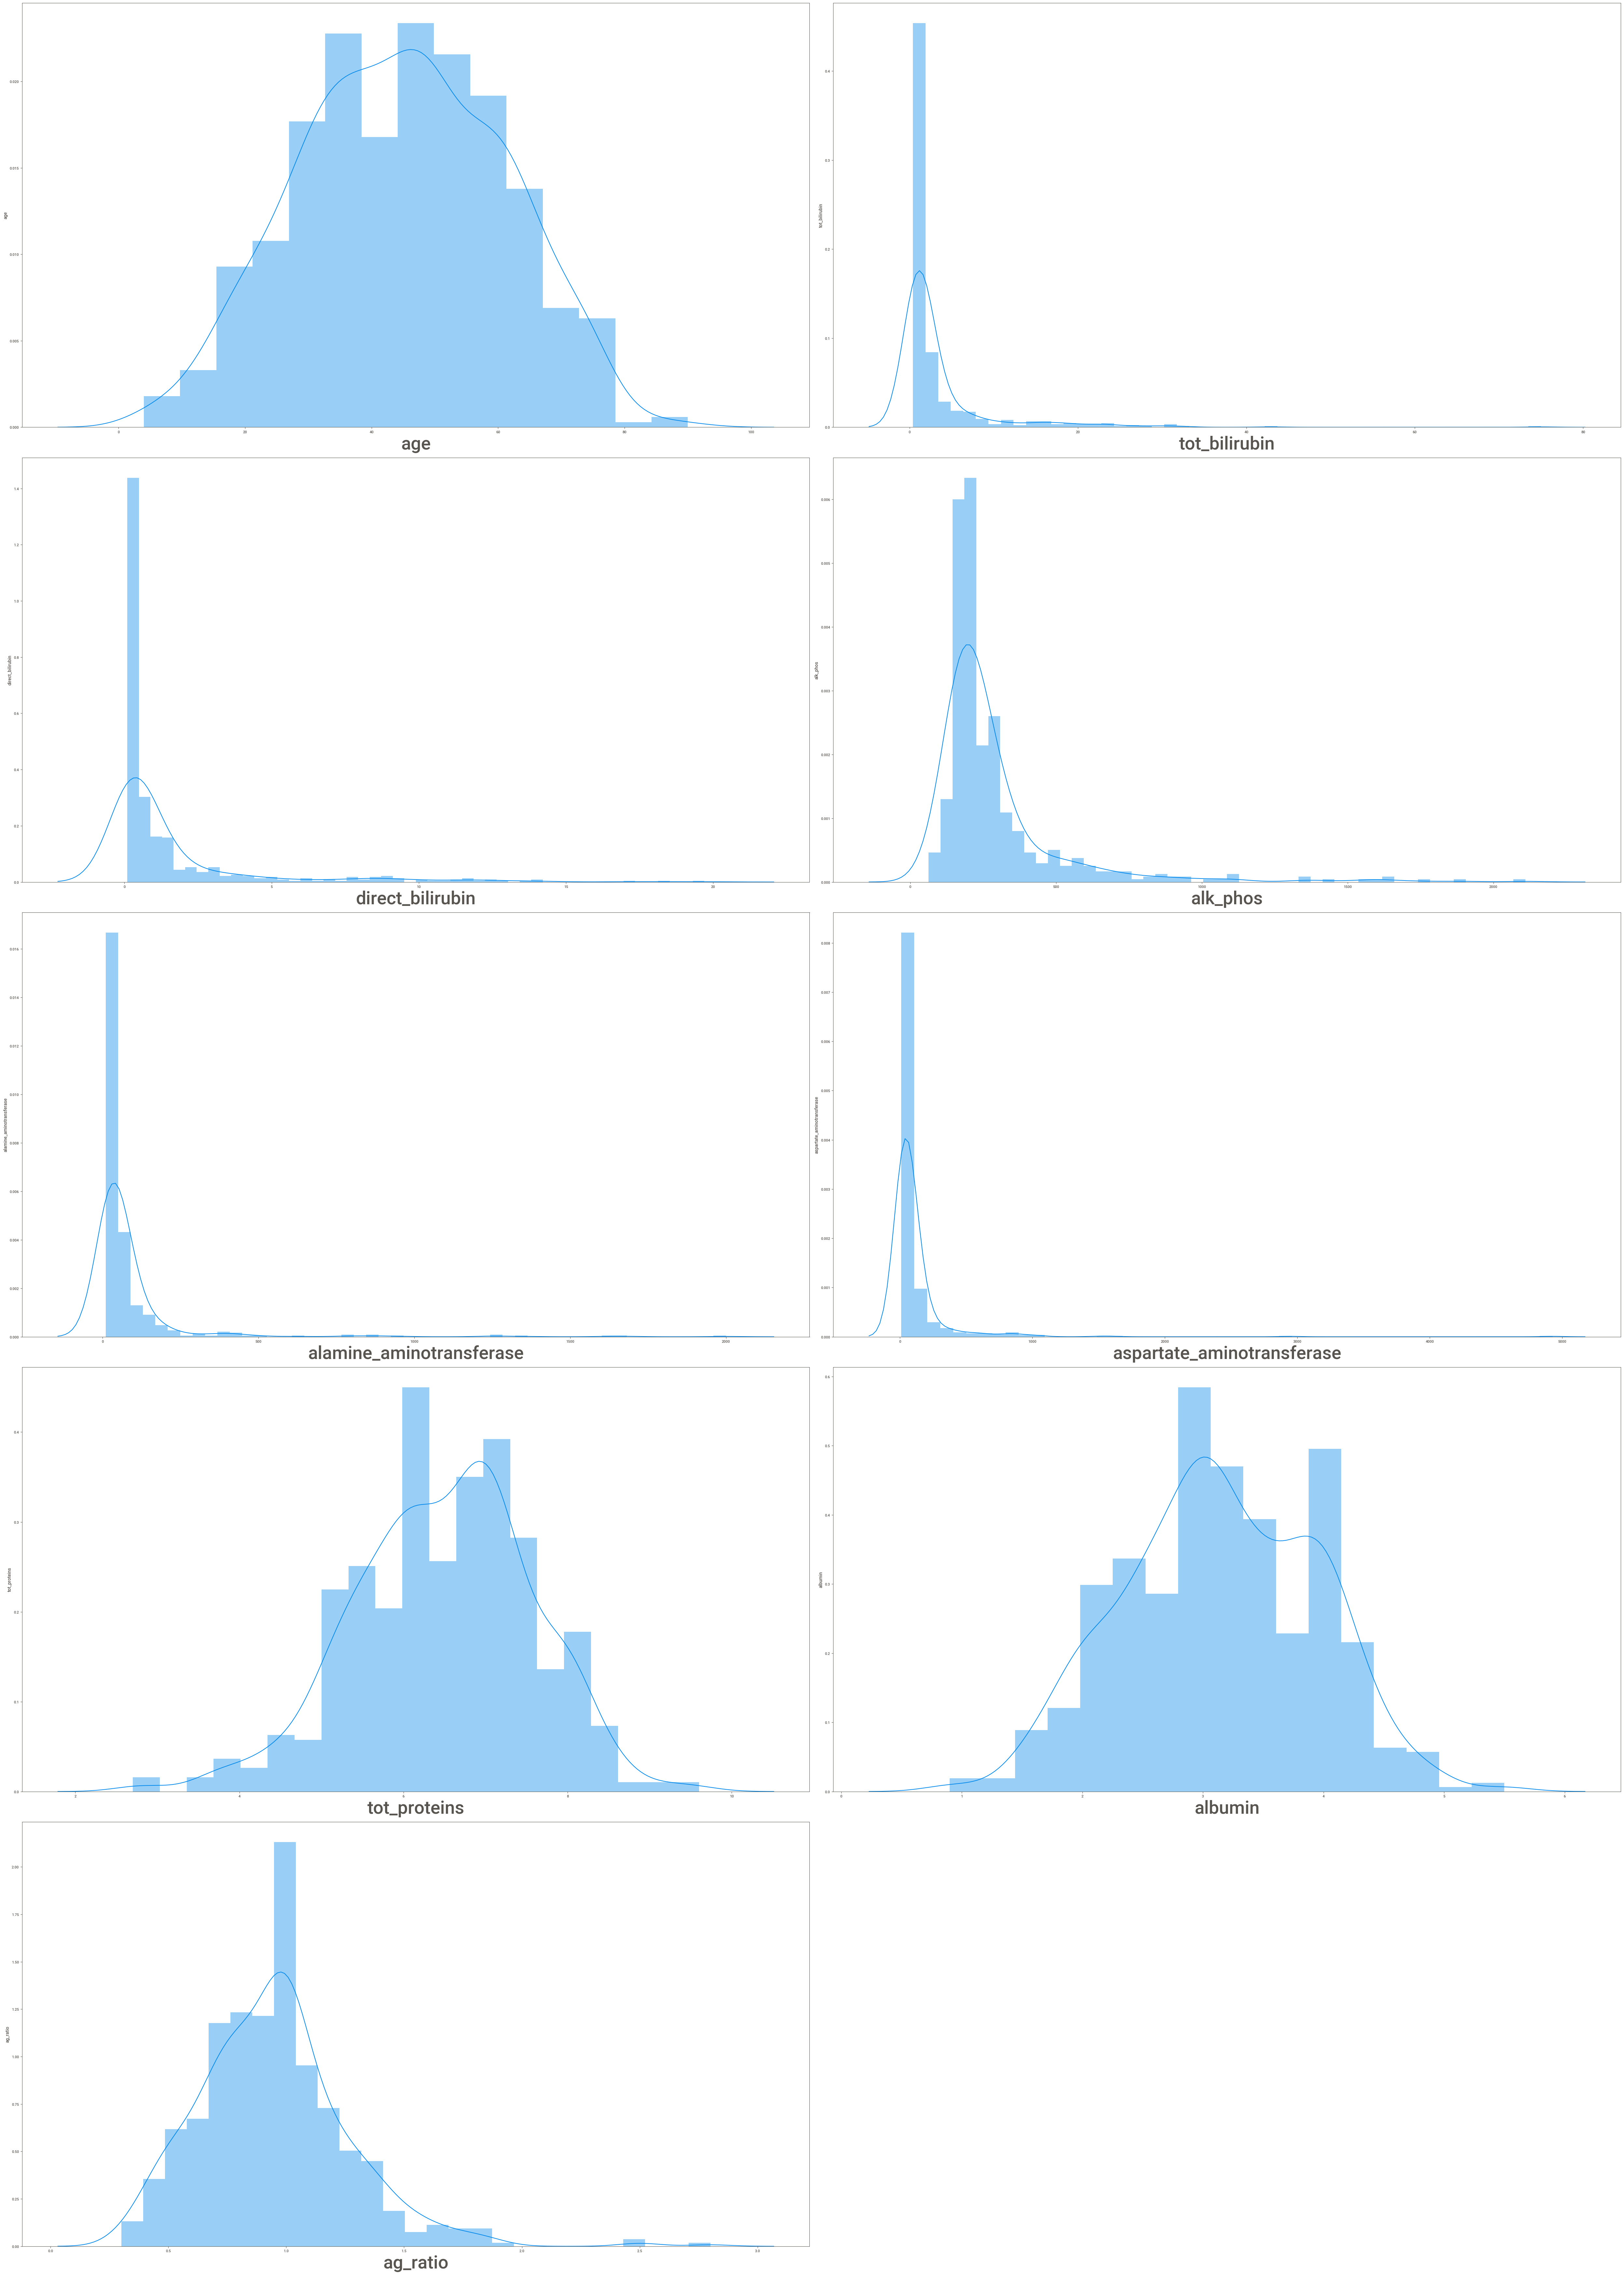

In [132]:
plt.figure(figsize=(50,70))
plot_number=1
for i in data.drop(['target','gender'],axis=1):
    if plot_number<=10:
        ax=plt.subplot(5,2,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize='40')
        plt.ylabel(i)
        plot_number+=1
plt.tight_layout()
    

* As we can see most of the data is normally distributed except few columns.
* And some of the columns have skewness

In [133]:
#defining function to avoid writing same code multiple times

def plot_continuos(feature,size,fontsize):
    plt.figure(figsize=size,facecolor='white')
    sns.histplot(data=data,x=feature,hue='target')
    plt.xlabel(feature,fontsize=fontsize)

####  Comparing each feature variable with the target variable

##### 1.Age

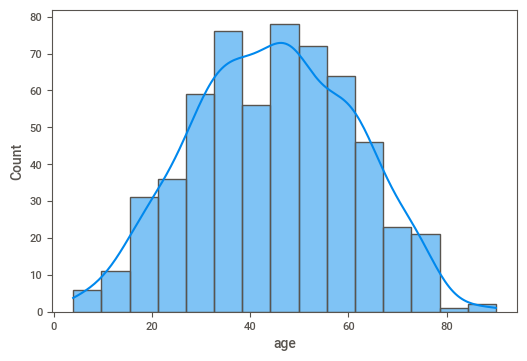

In [134]:
sns.histplot(data=data,x=data['age'],kde=True);

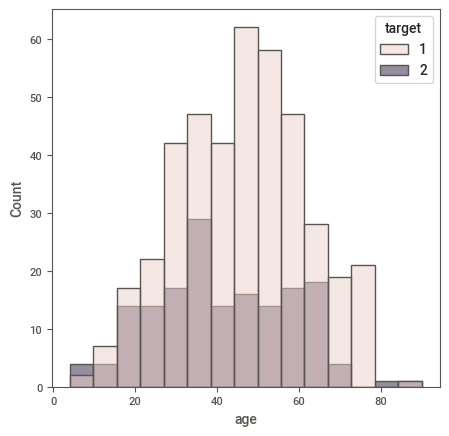

In [135]:
plot_continuos('age',(5,5),10)

By the above graph we can clearly see that age is normally distributed and as the age increases the chances of liver disease also increases

In [136]:
sns.set_style('whitegrid')

#### 2.Gender

Male      441
Female    141
Name: gender, dtype: int64

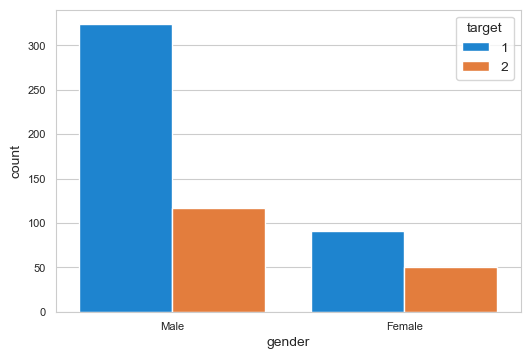

In [137]:
sns.countplot(x=data['gender'],hue=data['target']);
data['gender'].value_counts()

#### 3.Total Bilurubin

Text(0.5, 0, 'tot_bilirubin')

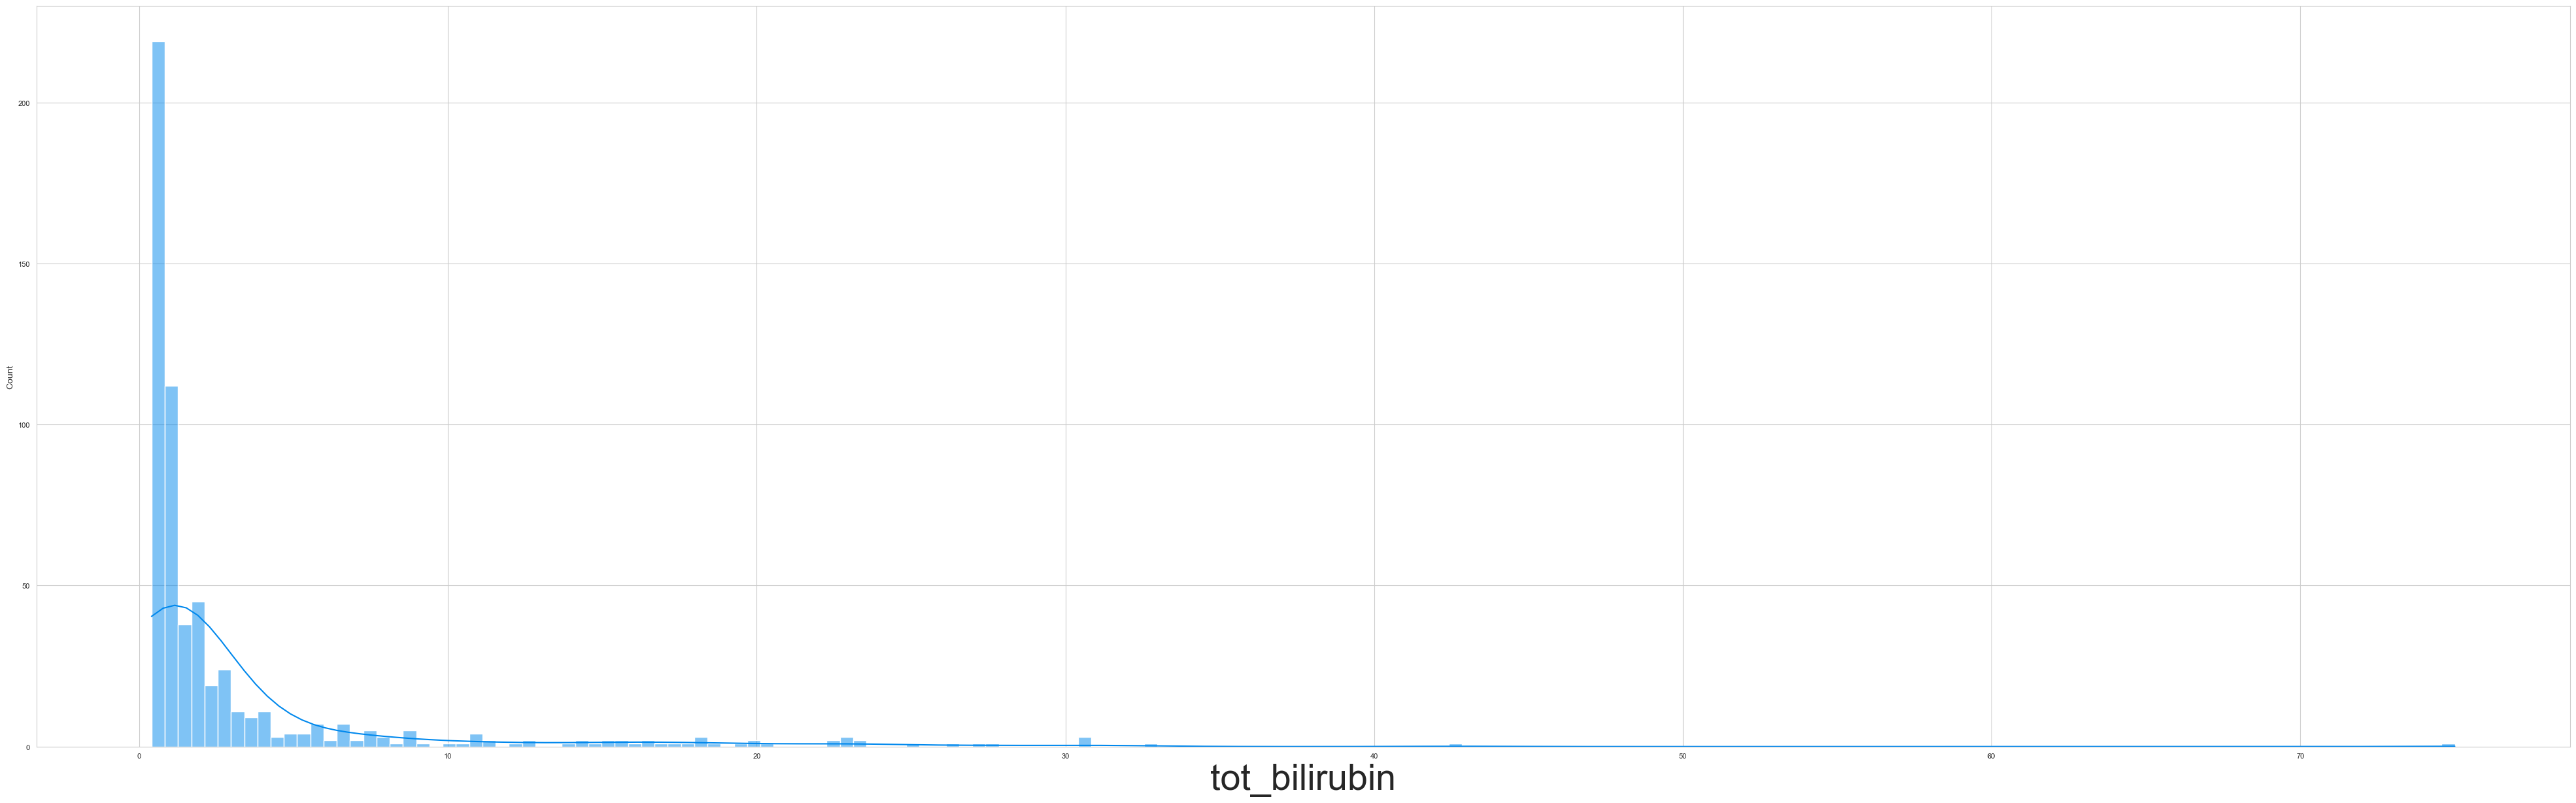

In [138]:
plt.figure(figsize=(50,15))
sns.histplot(x=data['tot_bilirubin'],kde=True);
plt.xlabel('tot_bilirubin',fontsize='40')

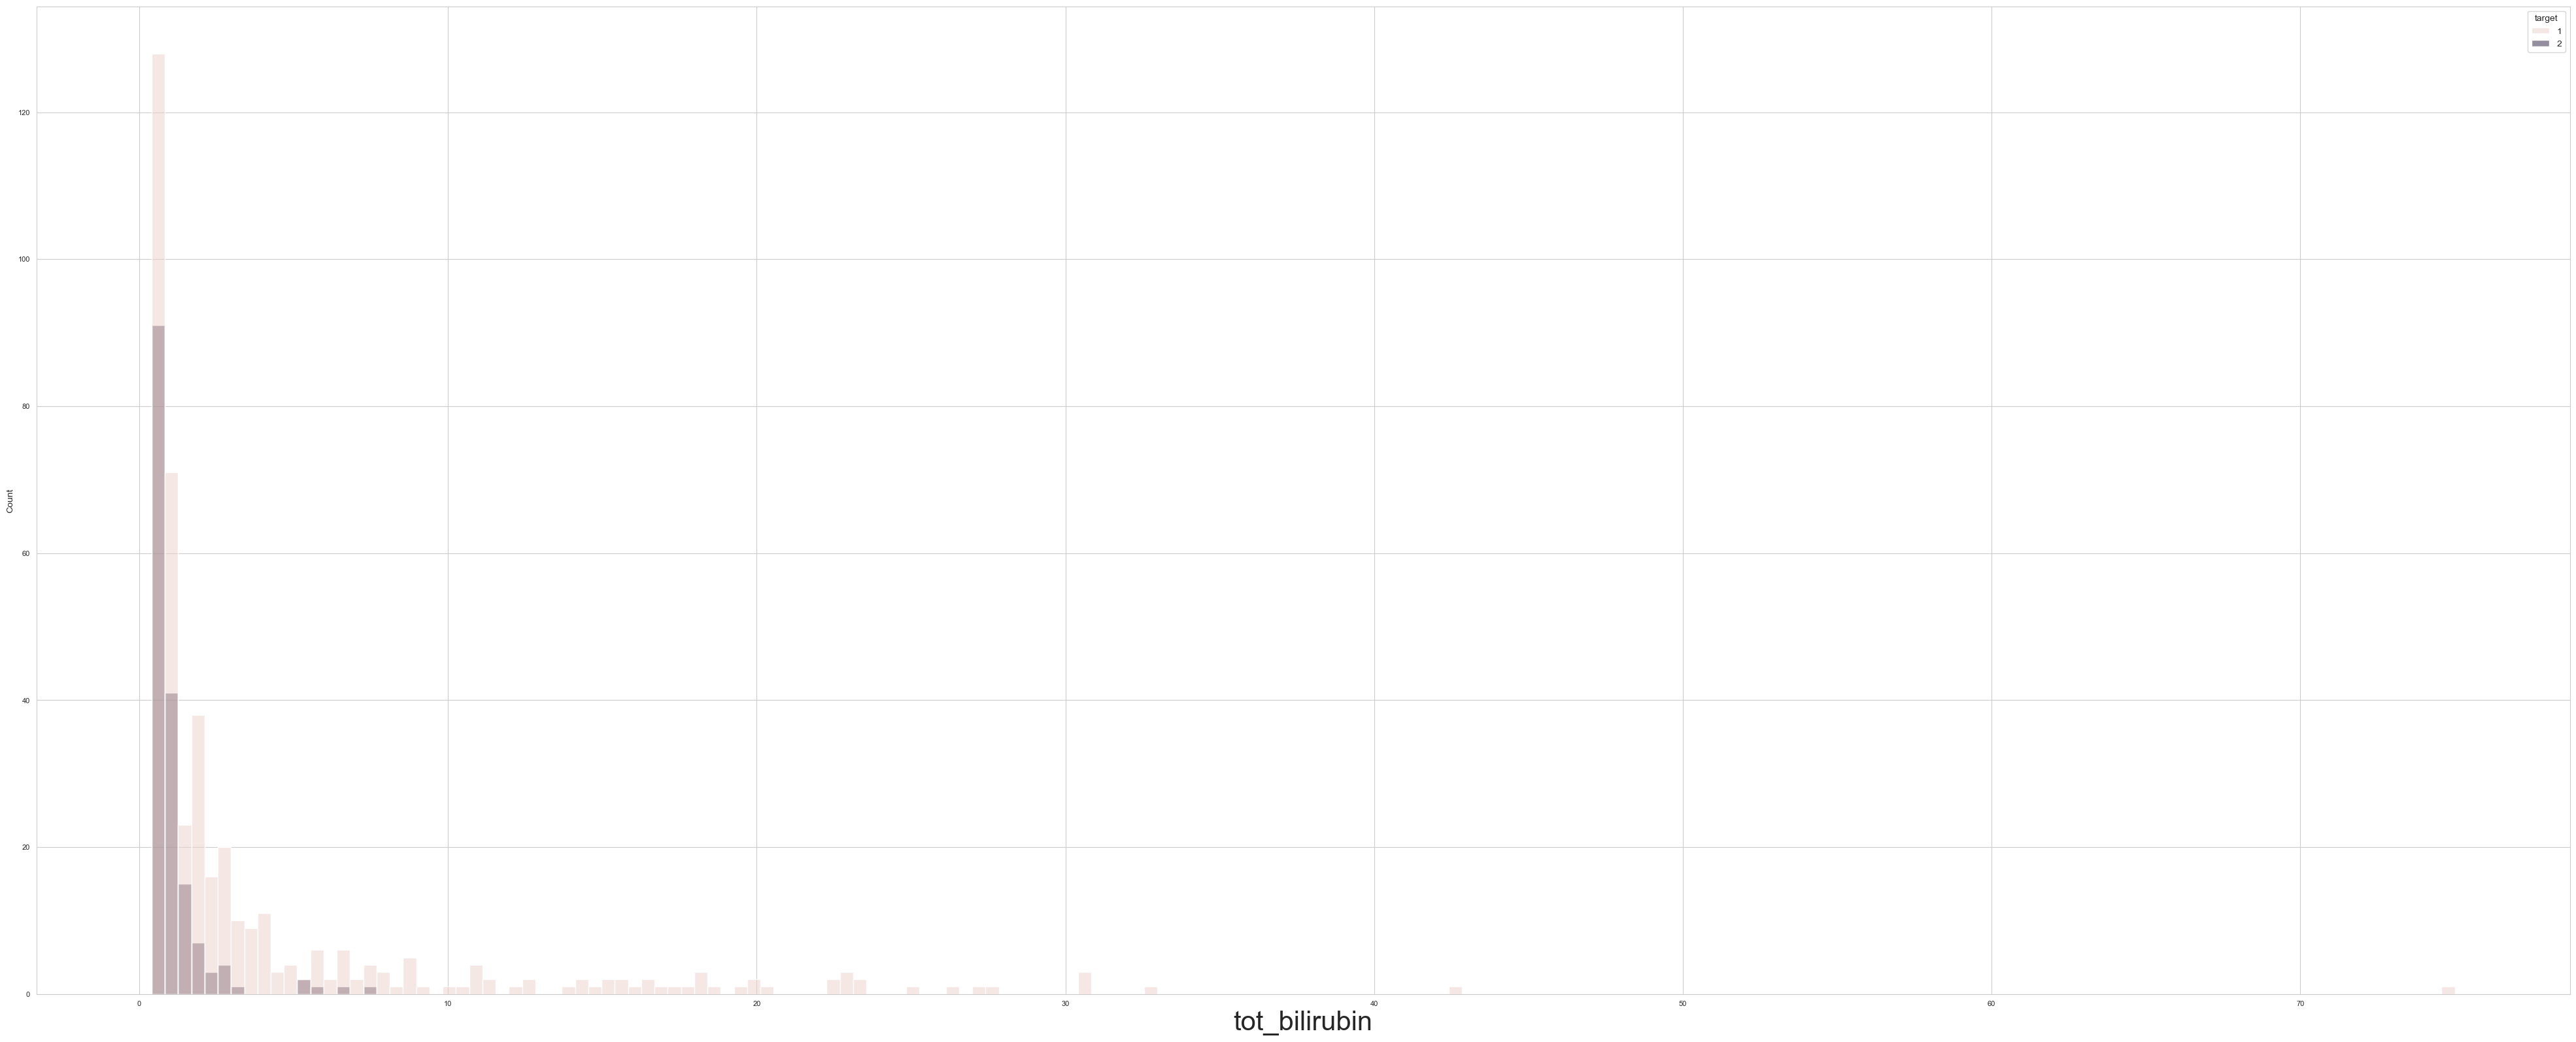

In [139]:
plot_continuos('tot_bilirubin',(50,20),30);

The graph shows that patients with total_bilirubin greater than 4 units are high likely to suffer from liver disease

In [140]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'alk_phos',
       'alamine_aminotransferase', 'aspartate_aminotransferase',
       'tot_proteins', 'albumin', 'ag_ratio', 'target'],
      dtype='object')

#### 4.Direct bilirubin

Text(0.5, 0, 'direct_bilirubin')

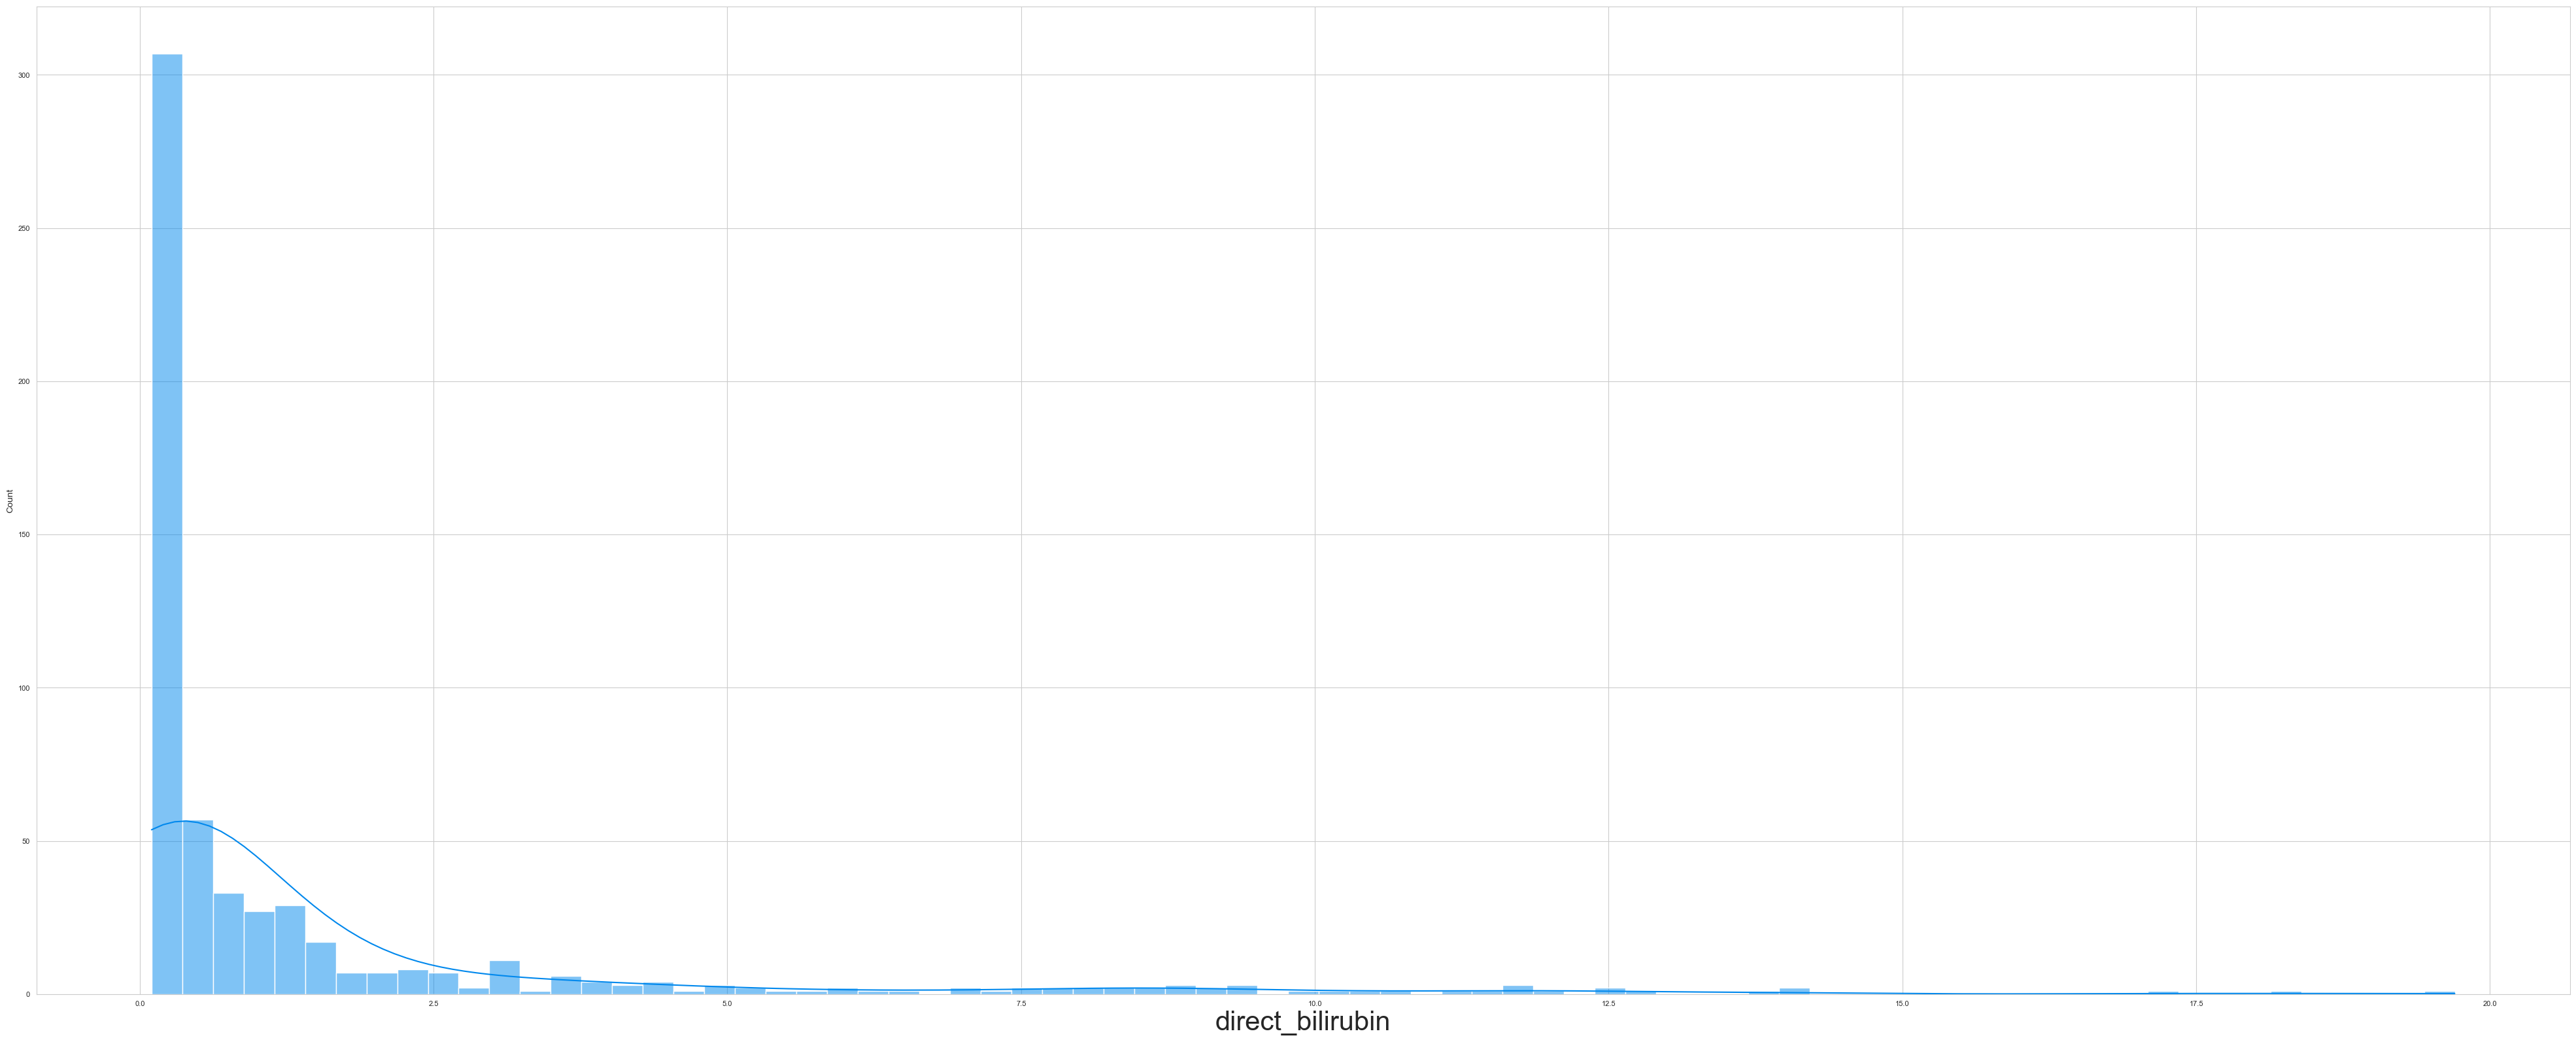

In [141]:
plt.figure(figsize=(50,20))
sns.histplot(x=data['direct_bilirubin'],kde=True)
plt.xlabel('direct_bilirubin',fontsize='30')

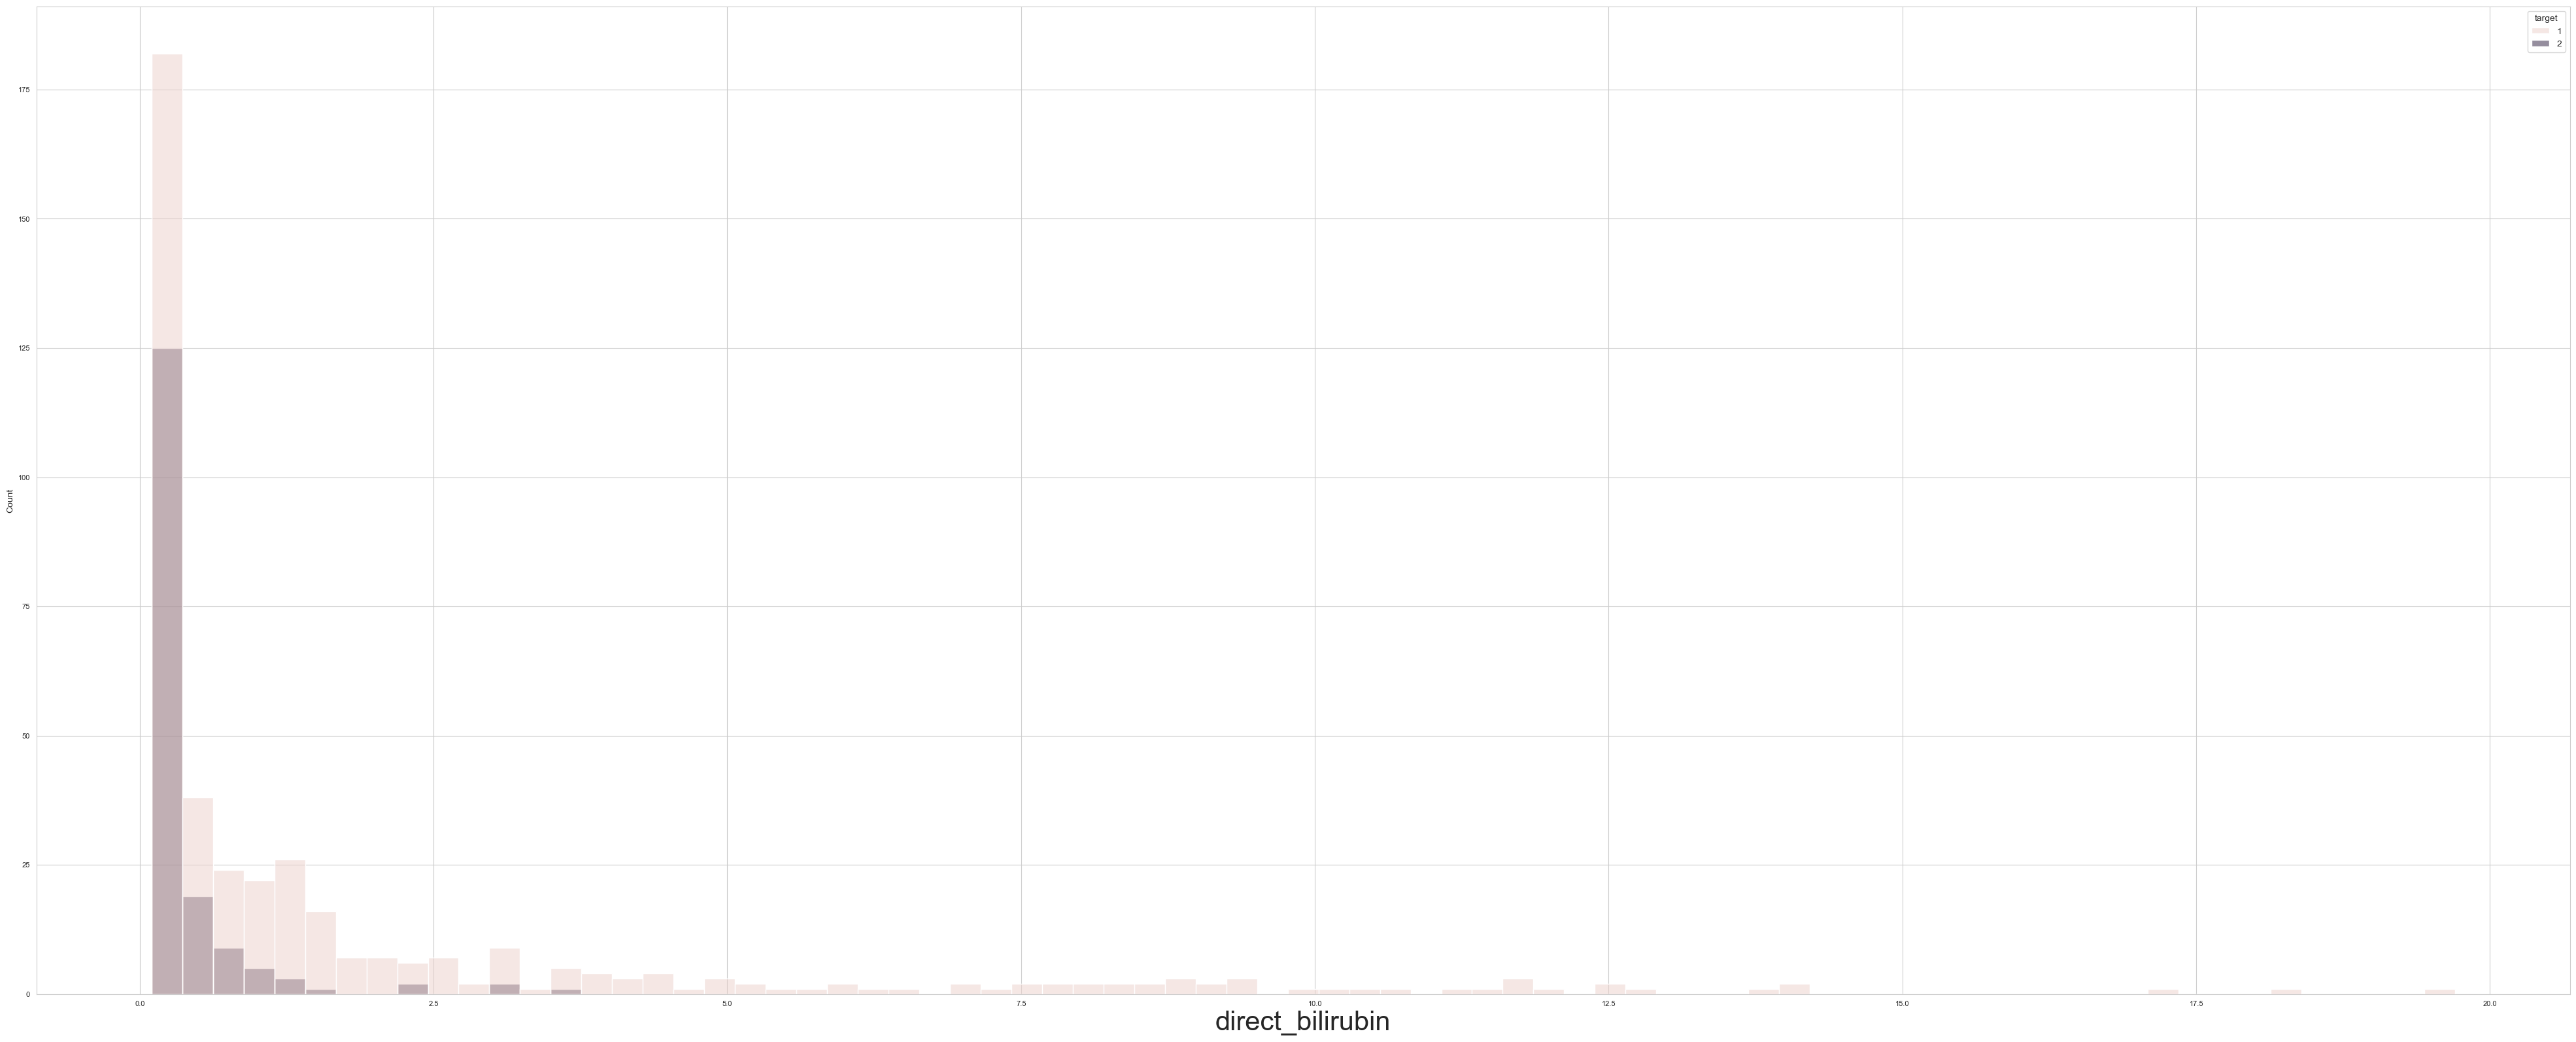

In [144]:
plot_continuos('direct_bilirubin',(50,20),30)

As we can see the ideal range of direct bilirubin is less than 0.8,as the direct bilirubin crosses 2 the patient is likely to suffer from a liver disease

#### 5.alk_phos

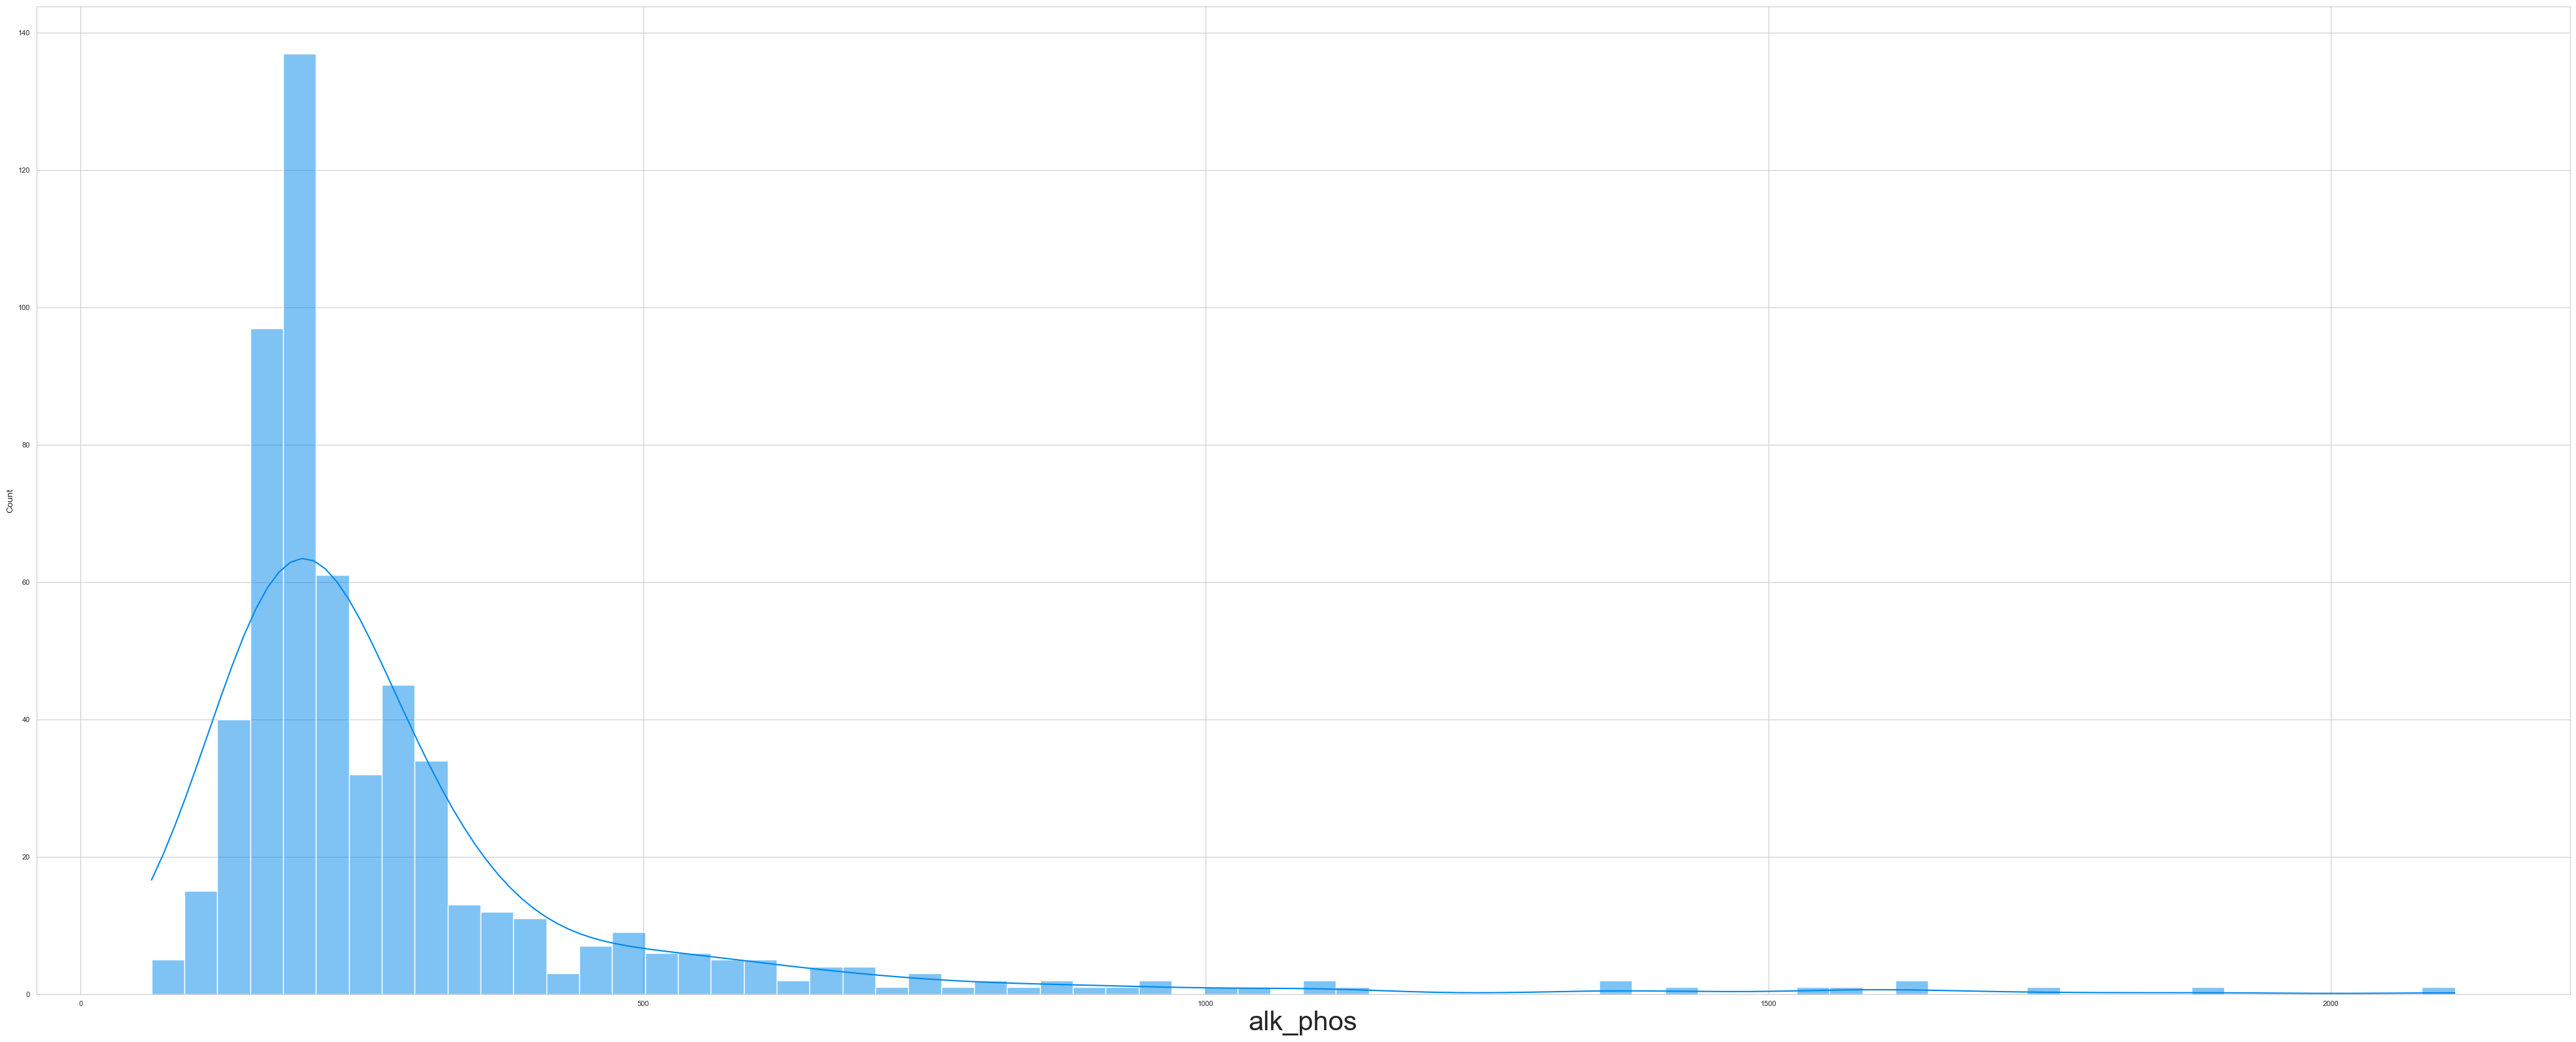

In [152]:
plt.figure(figsize=(50,20))
sns.histplot(x=data['alk_phos'],kde=True)
plt.xlabel('alk_phos',fontsize='30')
plt.show()

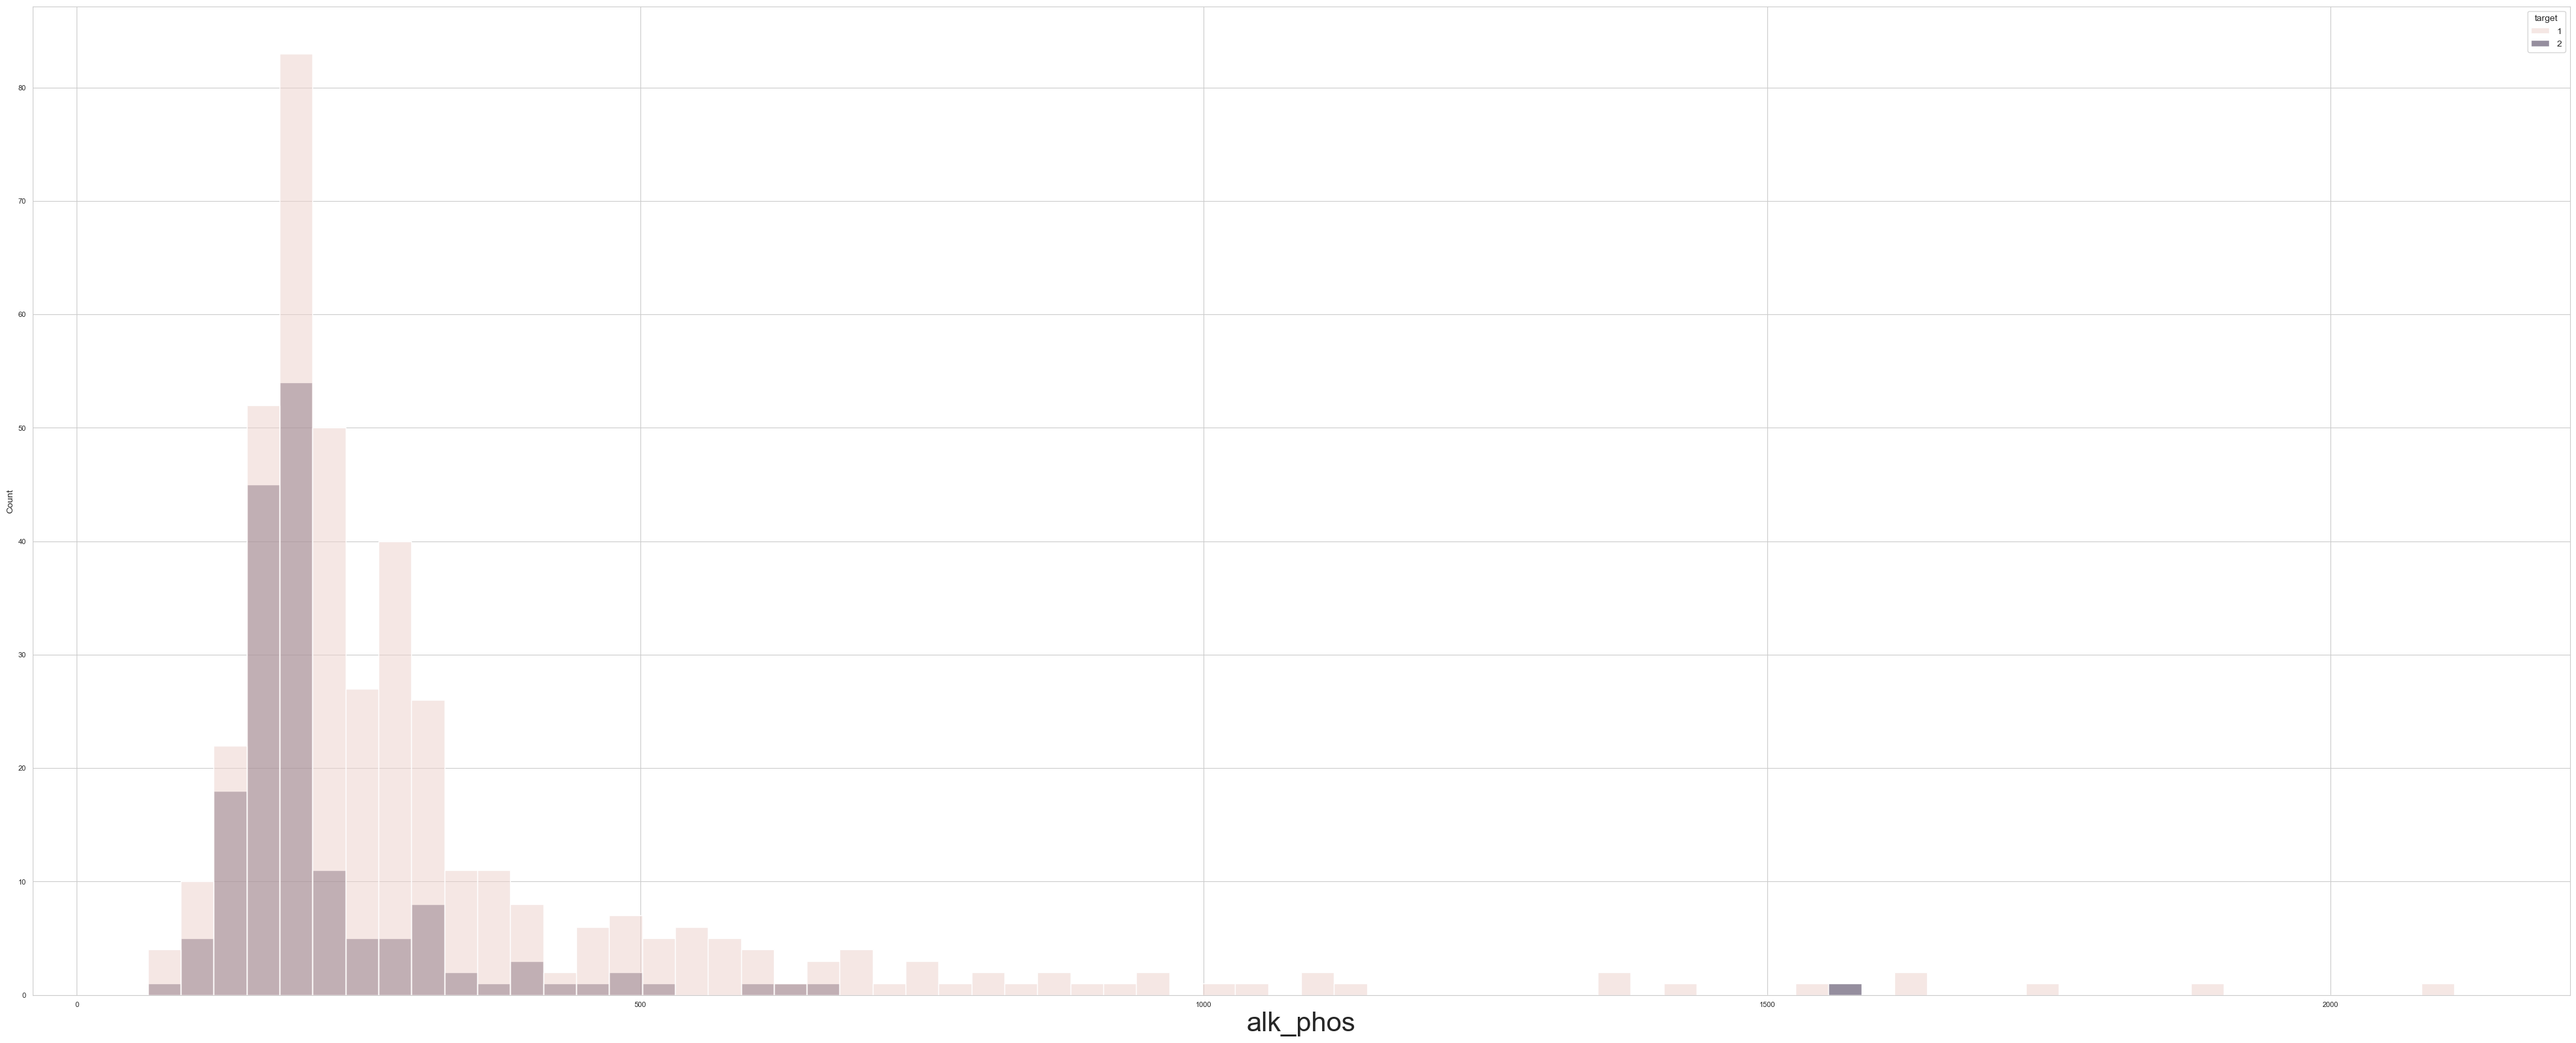

In [153]:
plot_continuos('alk_phos',(50,20),30)

* The ideal range is 40-150
* The patients with high alkaline phosphate level(approximately greater than 150) are likely to suffer from liver diseases

#### 5.Alamine aminotransferase

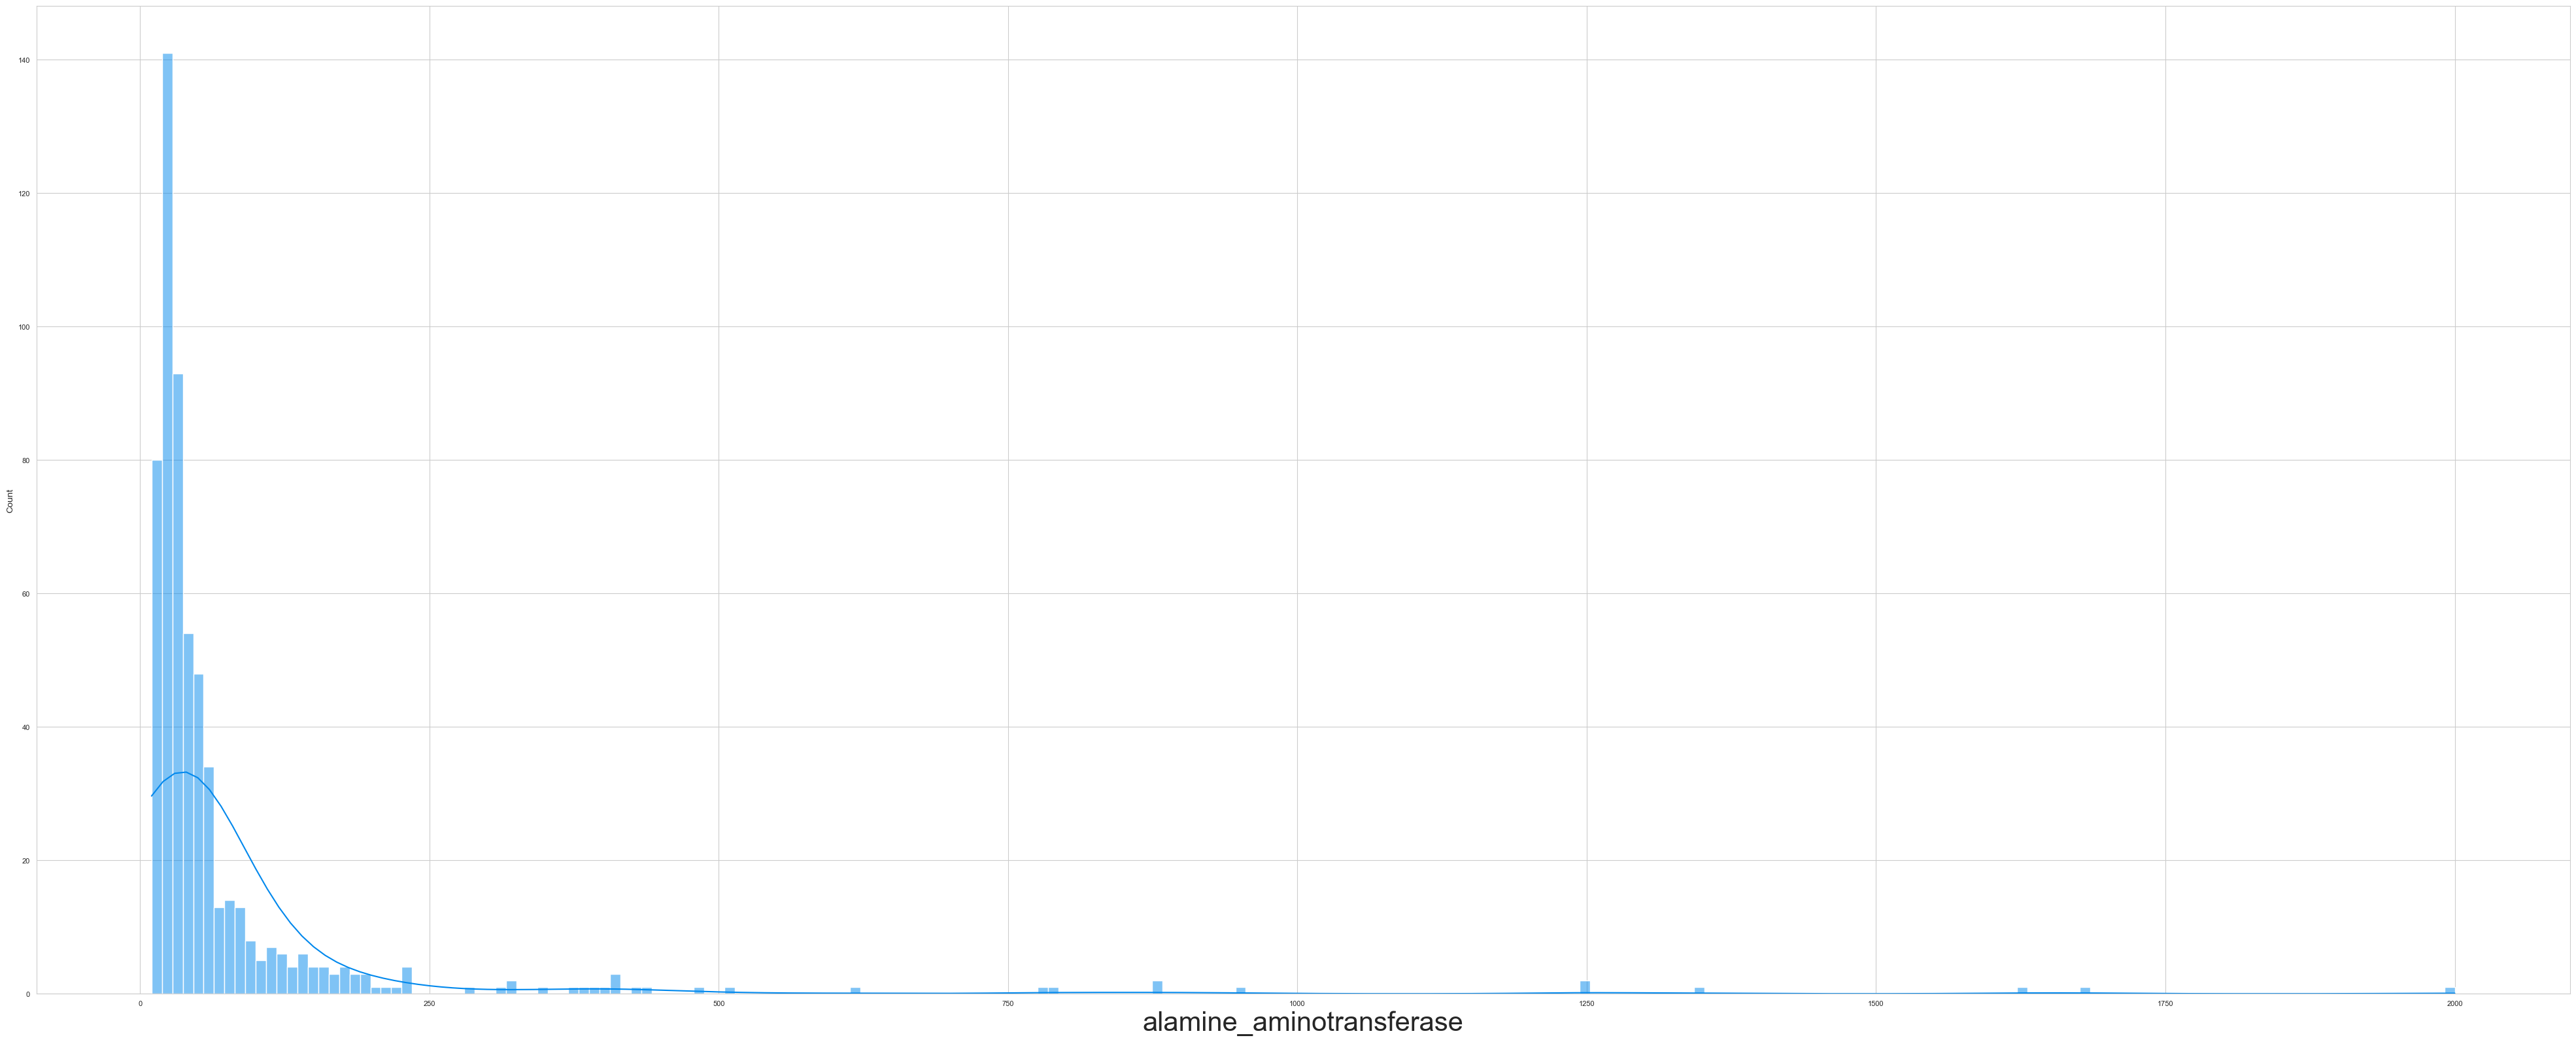

In [154]:
plt.figure(figsize=(50,20))
sns.histplot(x=data['alamine_aminotransferase'],kde=True)
plt.xlabel('alamine_aminotransferase',fontsize='30')
plt.show()

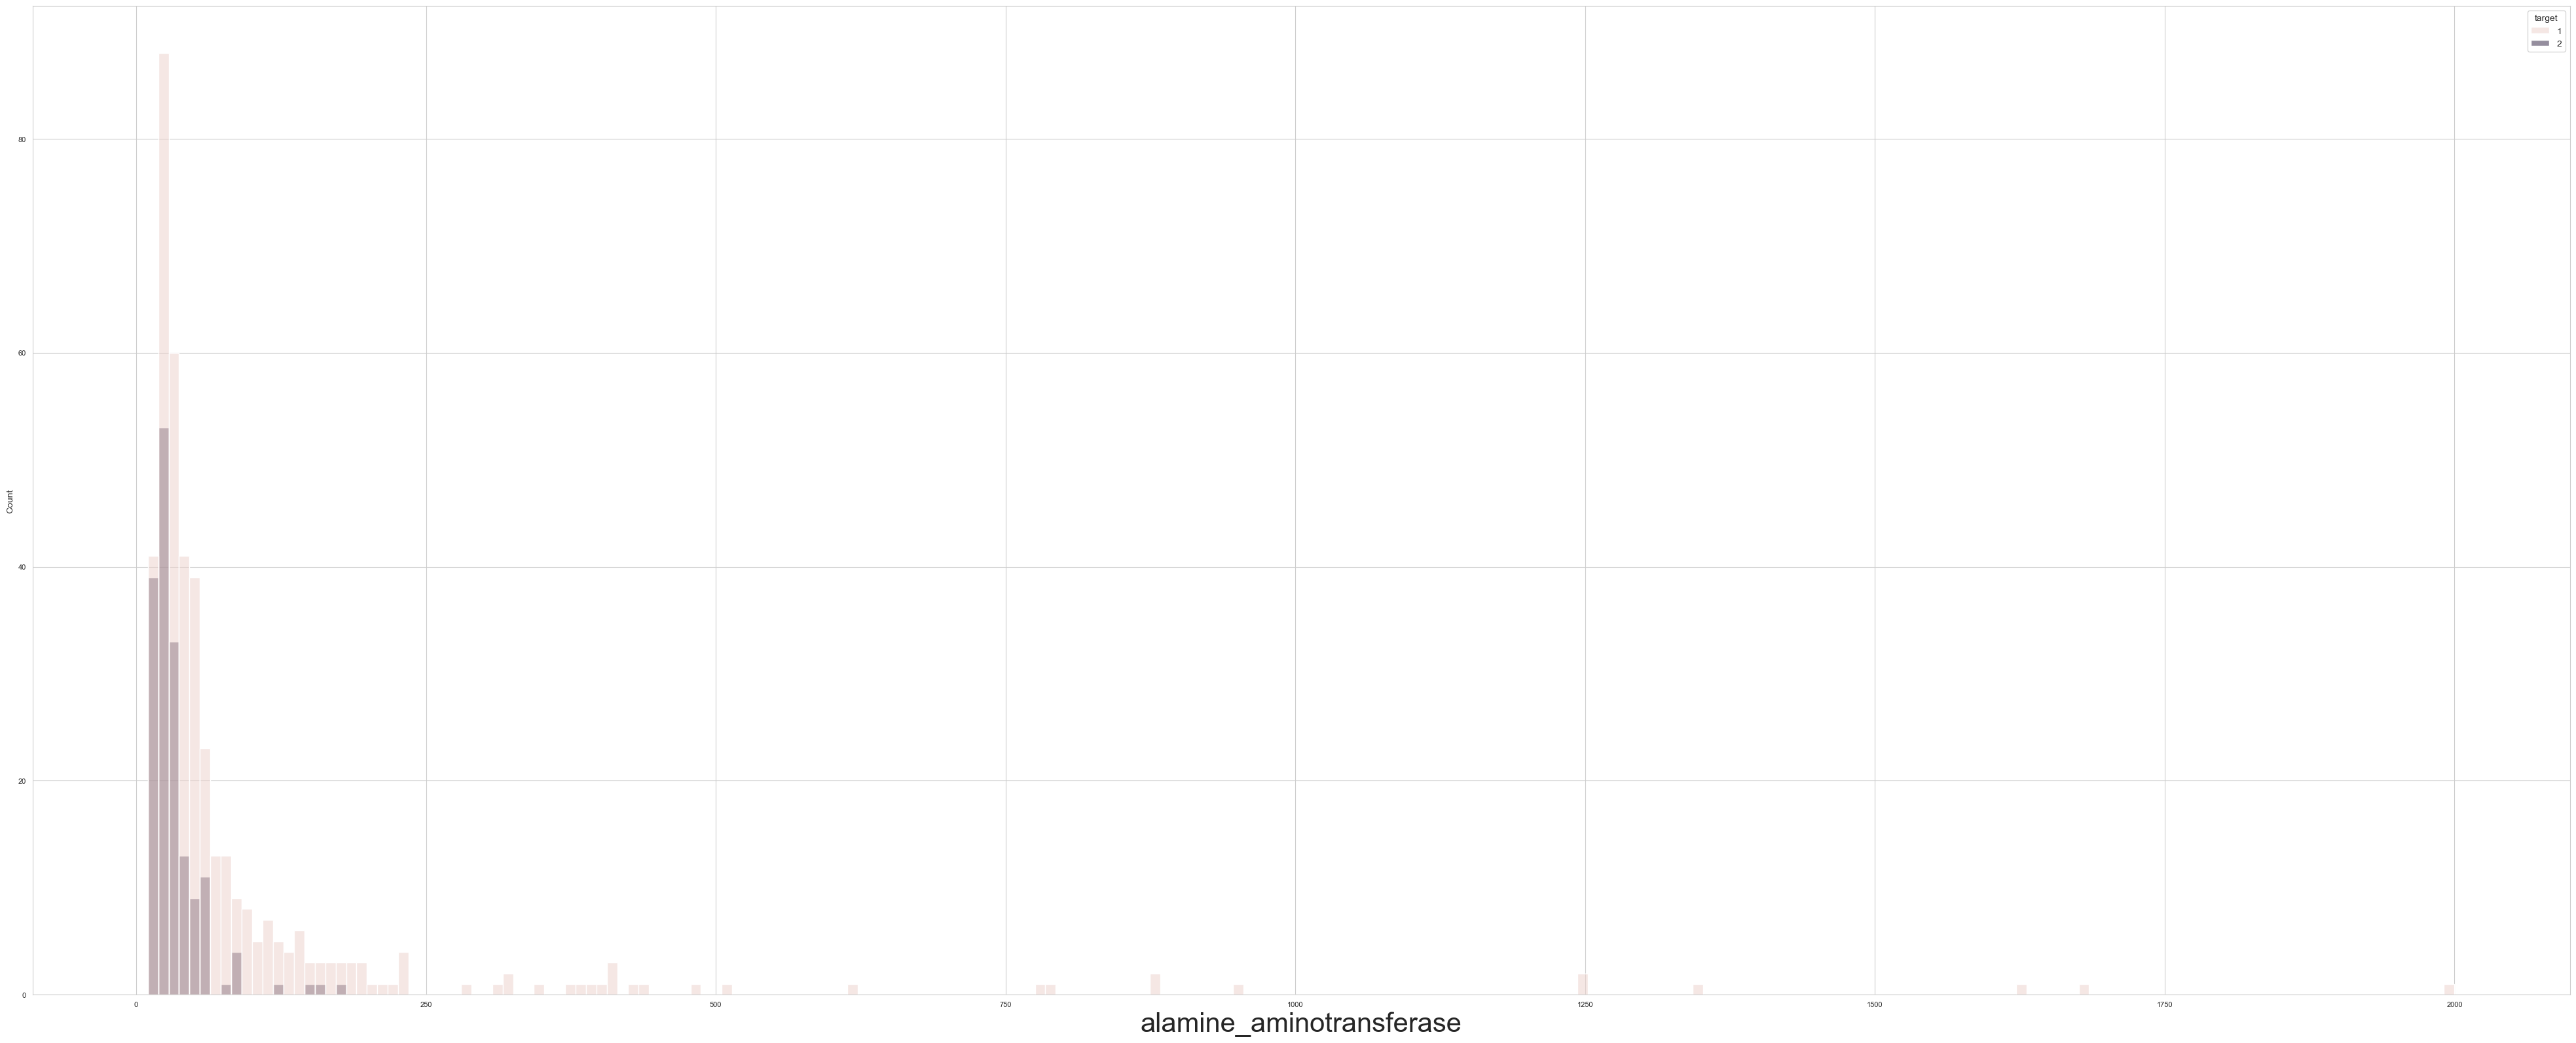

In [155]:
plot_continuos('alamine_aminotransferase',(50,20),30)

* The ideal range is 0-80
* As we can see patients with alamine transferase level less than 70 are disease free,The patients with alamine aminotransferase level greater than 100 are likely to suffer from liver disease

#### 6.Asparate aminotransferase

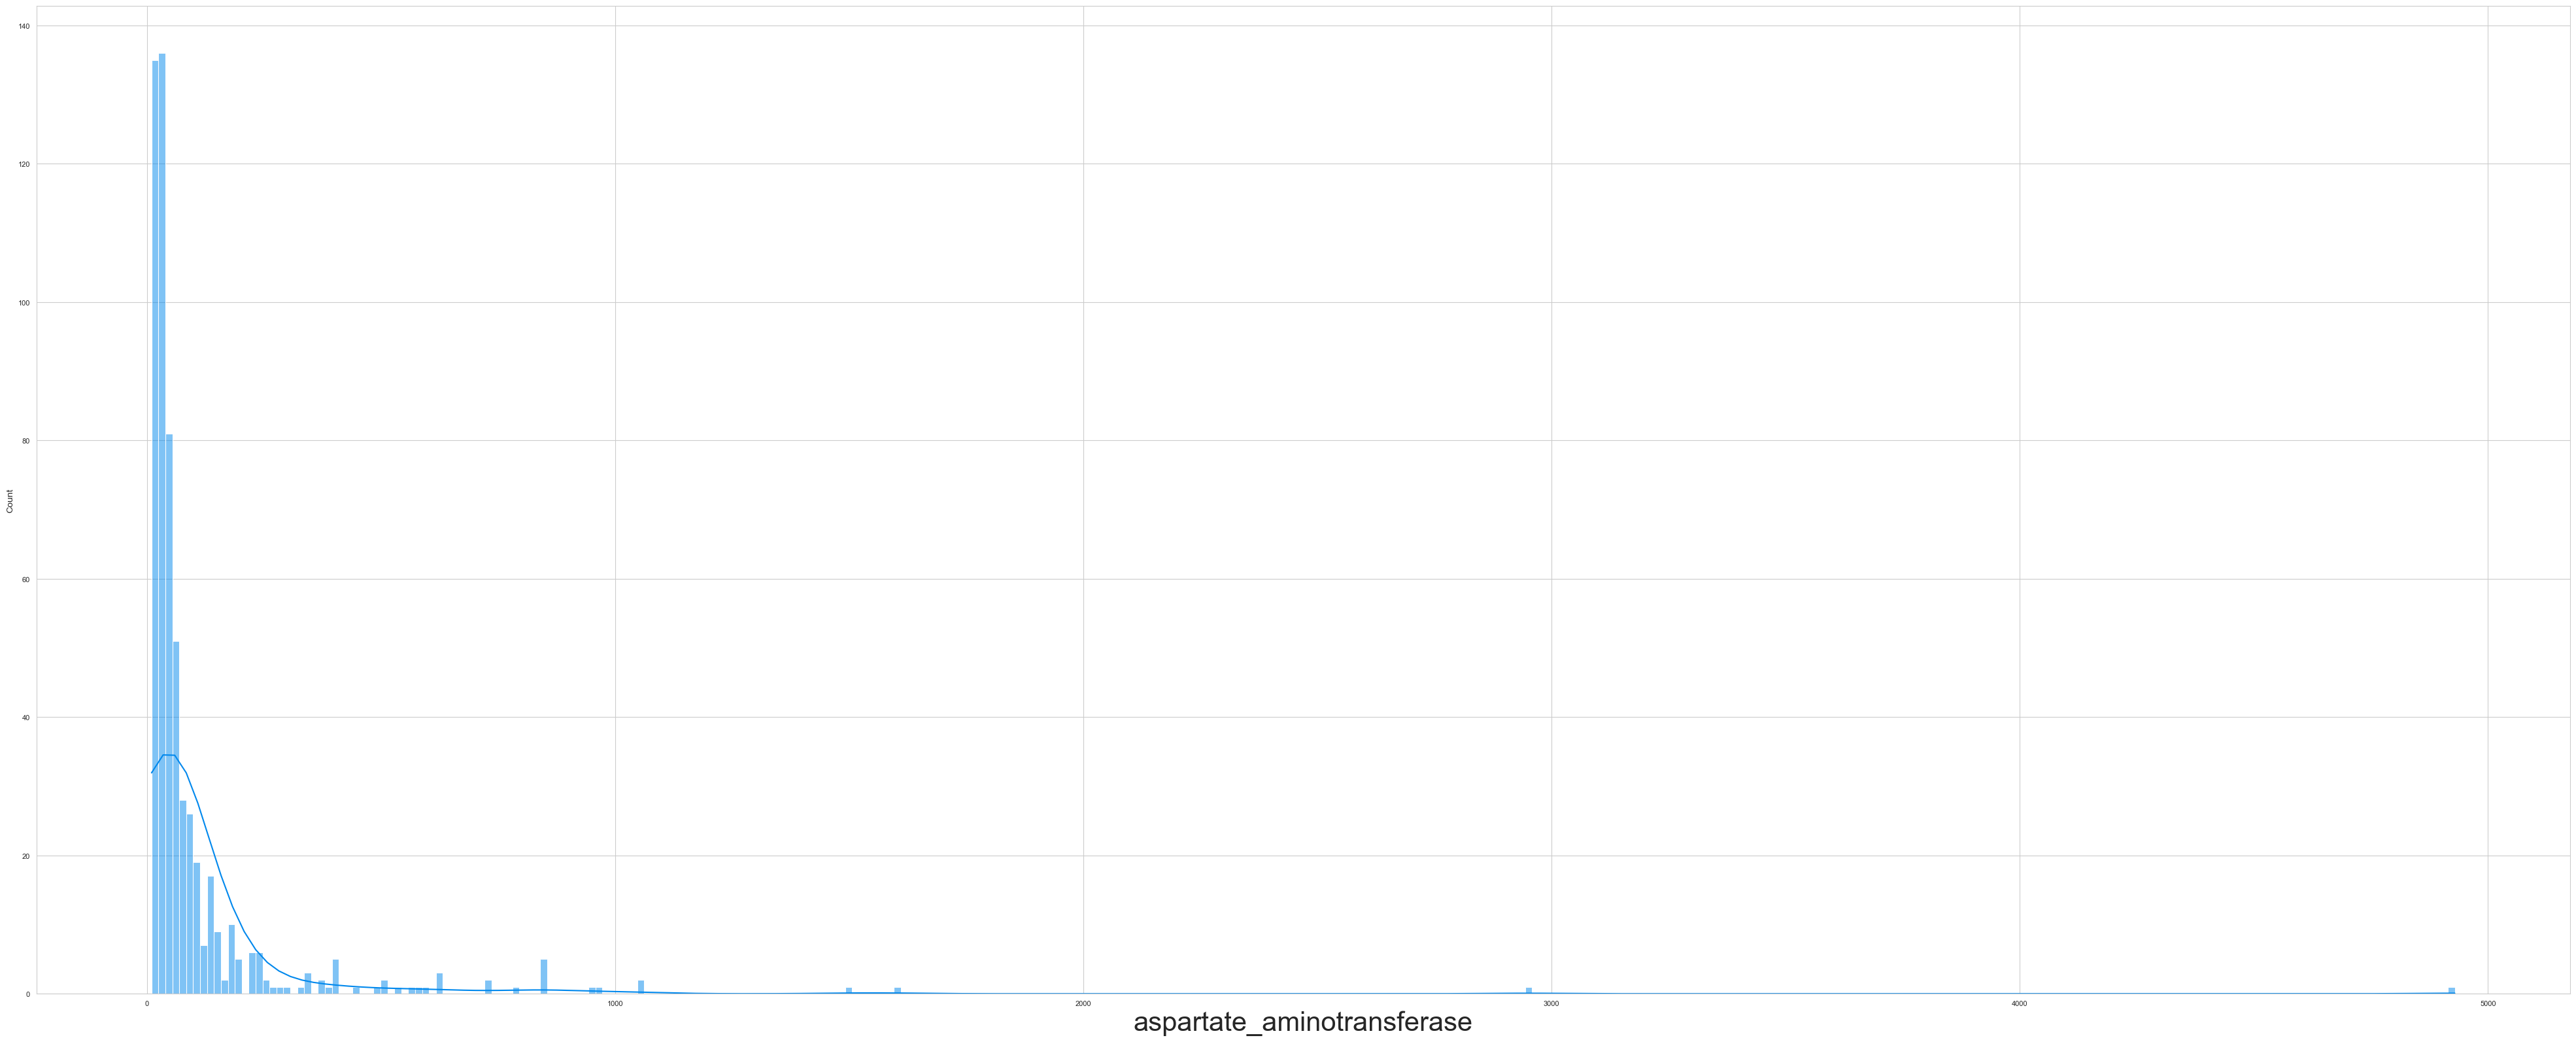

In [157]:
plt.figure(figsize=(50,20))
sns.histplot(x=data['aspartate_aminotransferase'],kde=True)
plt.xlabel('aspartate_aminotransferase',fontsize='30')
plt.show()

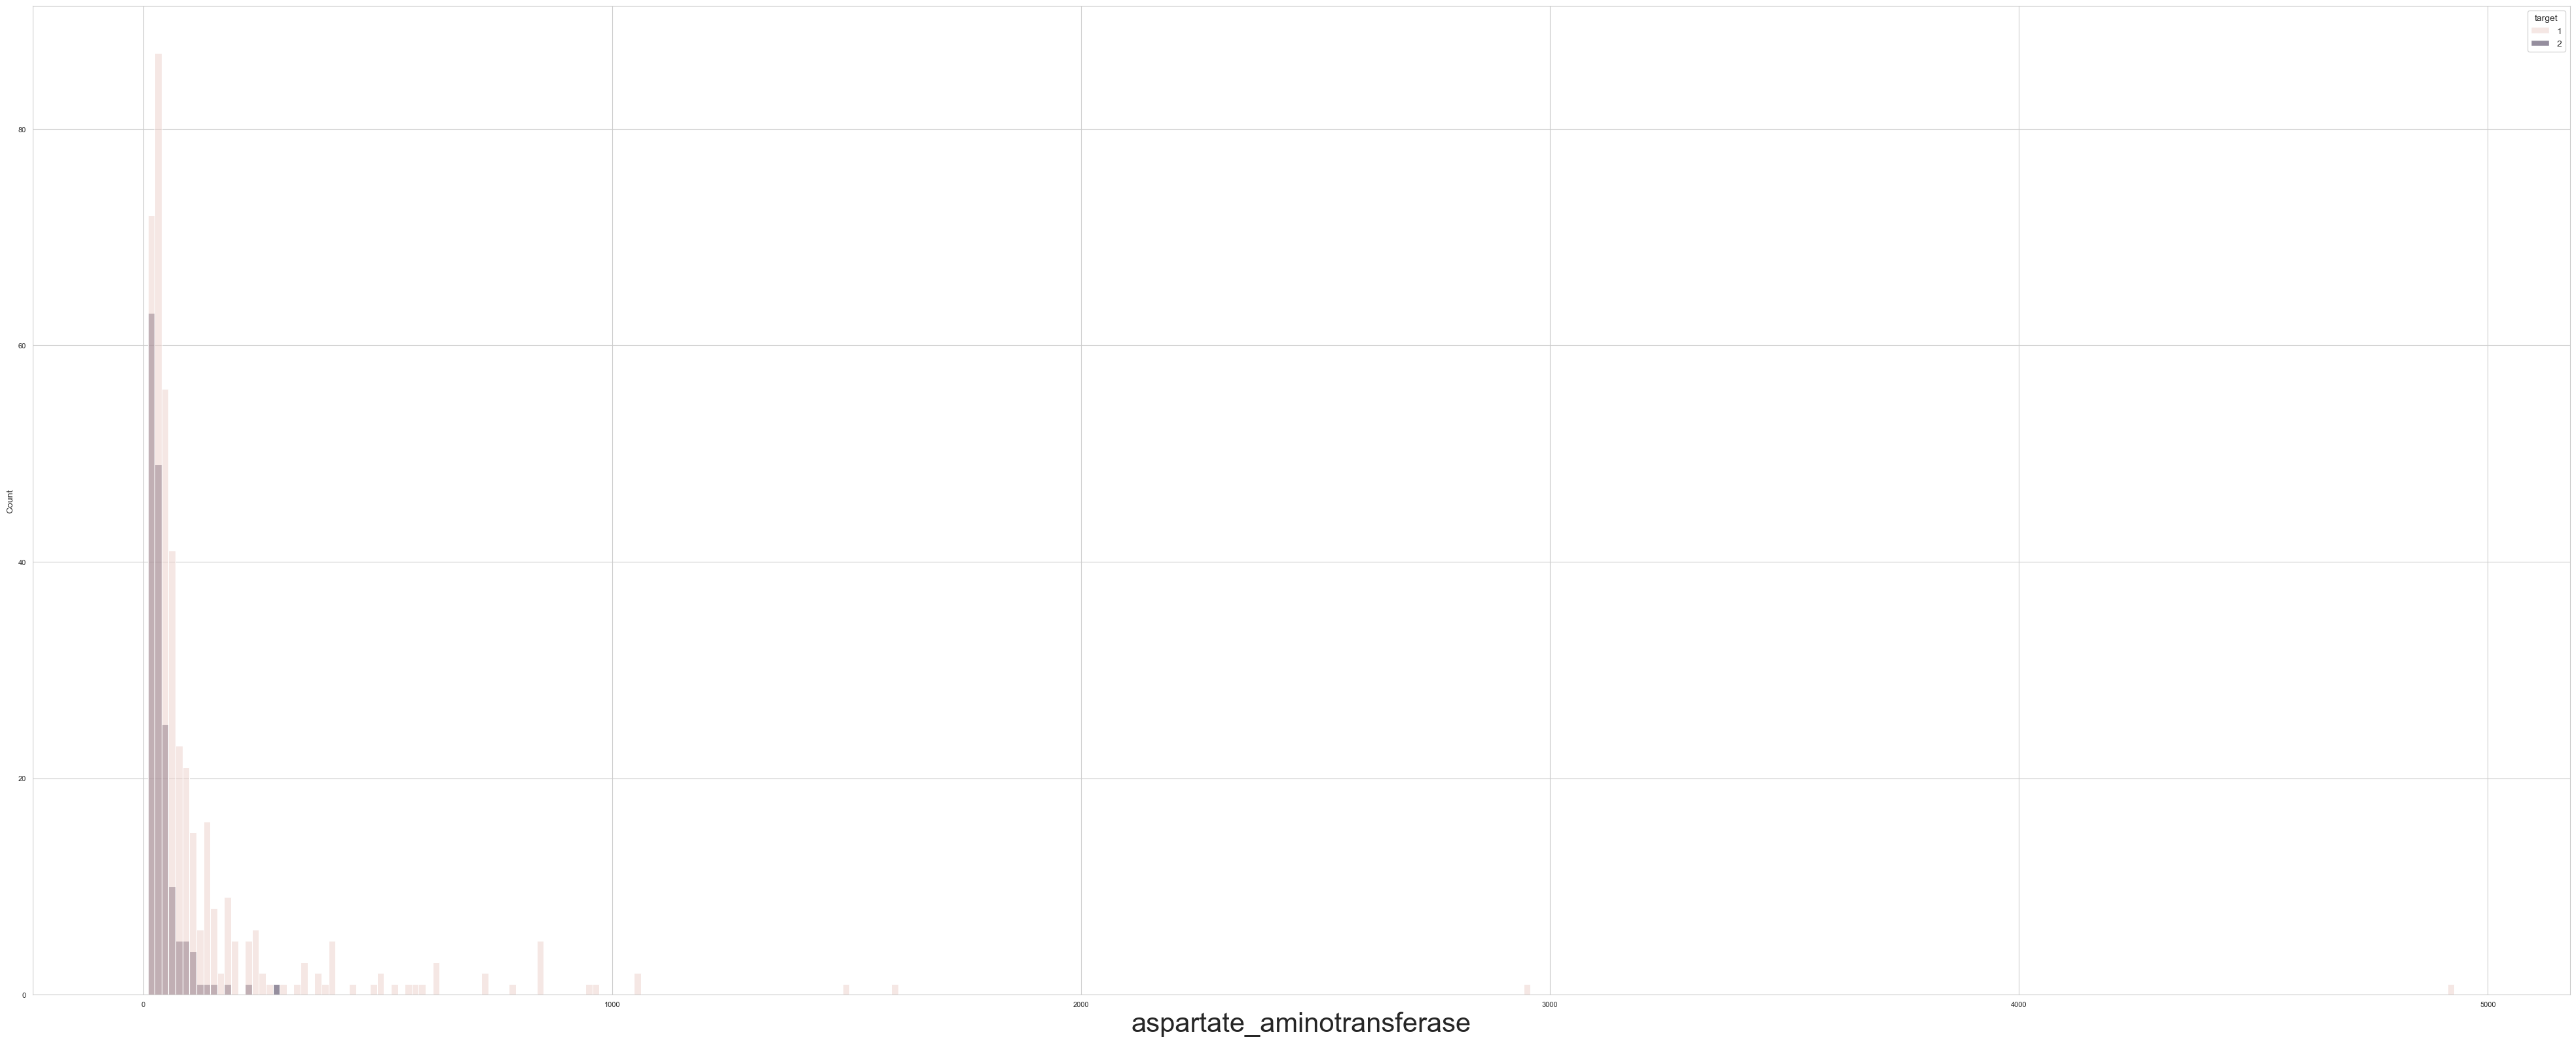

In [158]:
plot_continuos('aspartate_aminotransferase',(50,20),30)

Higher the aspartate aminotransferase level ,more likely the patient is suffering from liver disease

#### 7.Total proteins

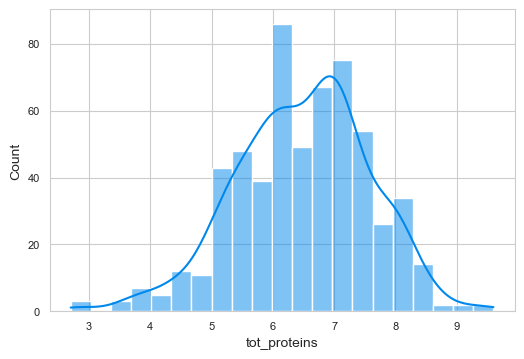

In [159]:
sns.histplot(x=data['tot_proteins'],kde=True);

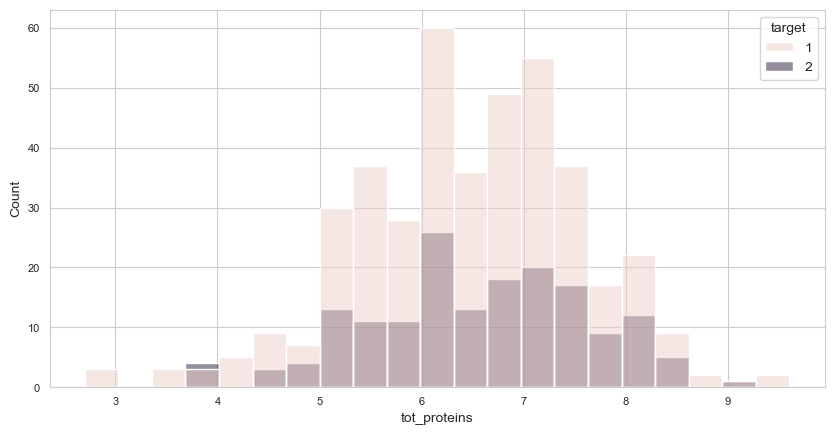

In [162]:
plot_continuos('tot_proteins',(10,5),10)

#### 8.Albumin

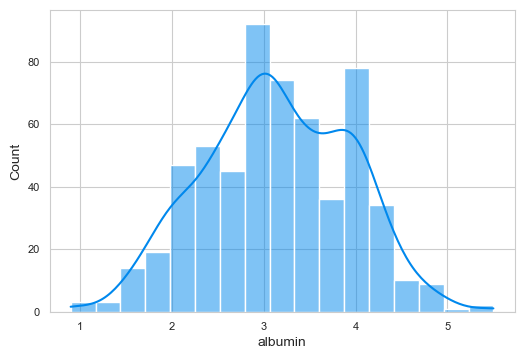

In [163]:

sns.histplot(x=data['albumin'],kde=True);

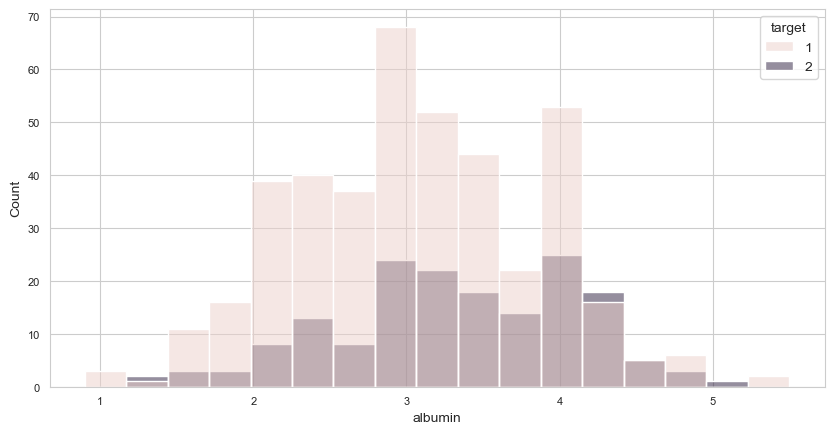

In [165]:
plot_continuos('albumin',(10,5),10)

#### 9.Albumin/globulin ratio

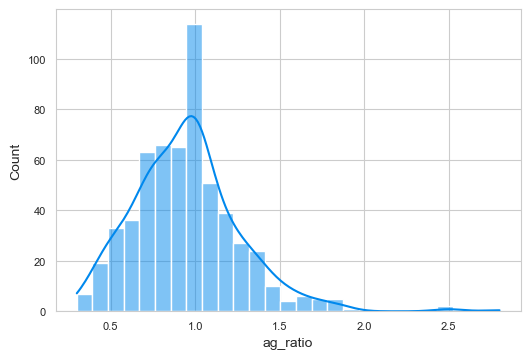

In [166]:
sns.histplot(x=data['ag_ratio'],kde=True);

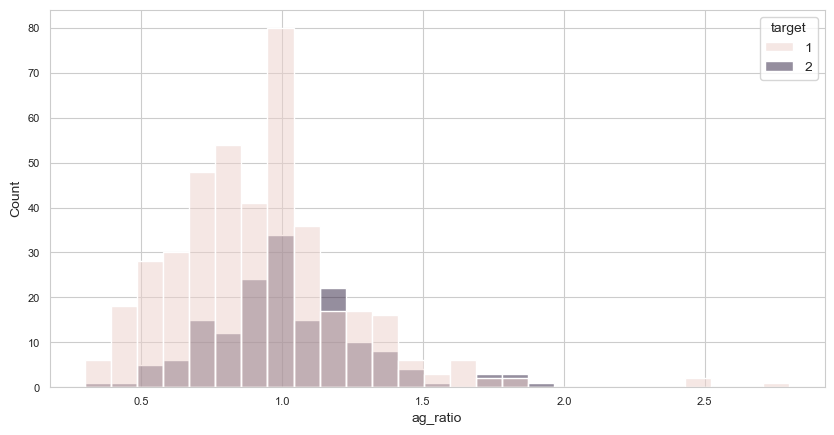

In [167]:
plot_continuos('ag_ratio',(10,5),10)

The last three features namely 'total proteins,albumin and ag ratio'  doesnt influence the target variable as much as the other variables

#### 10.Target

In [168]:
data.loc[data['target']==2,'target']=0

1    415
0    167
Name: target, dtype: int64

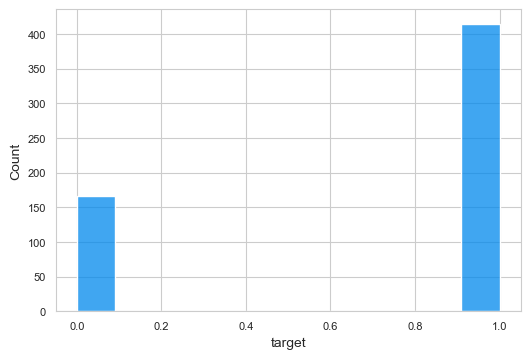

In [169]:
sns.histplot(data['target']);
data['target'].value_counts()

There are 415 patients with liver disease and 167 donot have liver disease

## 4.Data Preprocessing

#### i.Handling the missing values

In [171]:
data.isnull().sum()

age                           0
gender                        0
tot_bilirubin                 0
direct_bilirubin              0
alk_phos                      0
alamine_aminotransferase      0
aspartate_aminotransferase    0
tot_proteins                  0
albumin                       0
ag_ratio                      4
target                        0
dtype: int64

In [172]:
#ag_ratio has 4 missing values
data['ag_ratio'].value_counts()

1.00    106
0.80     65
0.90     58
0.70     53
1.10     46
       ... 
0.69      1
1.27      1
1.12      1
0.53      1
0.37      1
Name: ag_ratio, Length: 69, dtype: int64

In [173]:
data.loc[data['ag_ratio'].isnull()==True]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,0
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,0


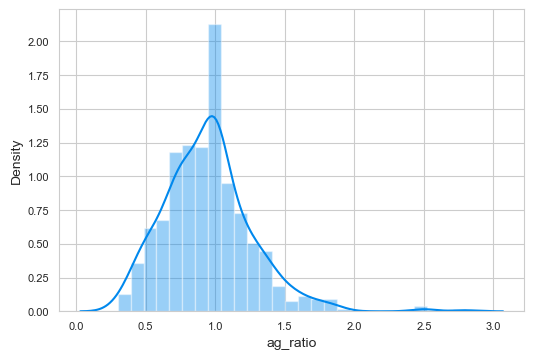

In [174]:
sns.distplot(data['ag_ratio']);

In [175]:
#as we can see the data is normally distributed but with some skewness its better to impute with median rather than mean

In [176]:
data.loc[data['ag_ratio'].isnull()==True,'ag_ratio']=data['ag_ratio'].median()

In [177]:
data.isnull().sum()

age                           0
gender                        0
tot_bilirubin                 0
direct_bilirubin              0
alk_phos                      0
alamine_aminotransferase      0
aspartate_aminotransferase    0
tot_proteins                  0
albumin                       0
ag_ratio                      0
target                        0
dtype: int64

In [178]:
data.loc[data['ag_ratio'].isnull()==True]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target


In [179]:
data['ag_ratio'].value_counts()

1.00    106
0.80     65
0.90     58
0.70     53
1.10     46
       ... 
0.69      1
1.27      1
1.12      1
0.53      1
0.37      1
Name: ag_ratio, Length: 70, dtype: int64

#### ii.Converting categorical features to numerical

In [180]:
#We have only one categorical column i.e Gender

In [181]:
data['gender']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
577    Male
578    Male
579    Male
580    Male
581    Male
Name: gender, Length: 582, dtype: object

In [182]:
data['gender'].value_counts()

Male      441
Female    141
Name: gender, dtype: int64

In [183]:
data['gender']=data['gender'].map({'Male':1,'Female':0})

In [184]:
data['gender']

0      1
1      1
2      1
3      1
4      1
      ..
577    1
578    1
579    1
580    1
581    1
Name: gender, Length: 582, dtype: int64

#### iii.Handling the outliers

In [185]:
#Lets first check how may features has outliers in them

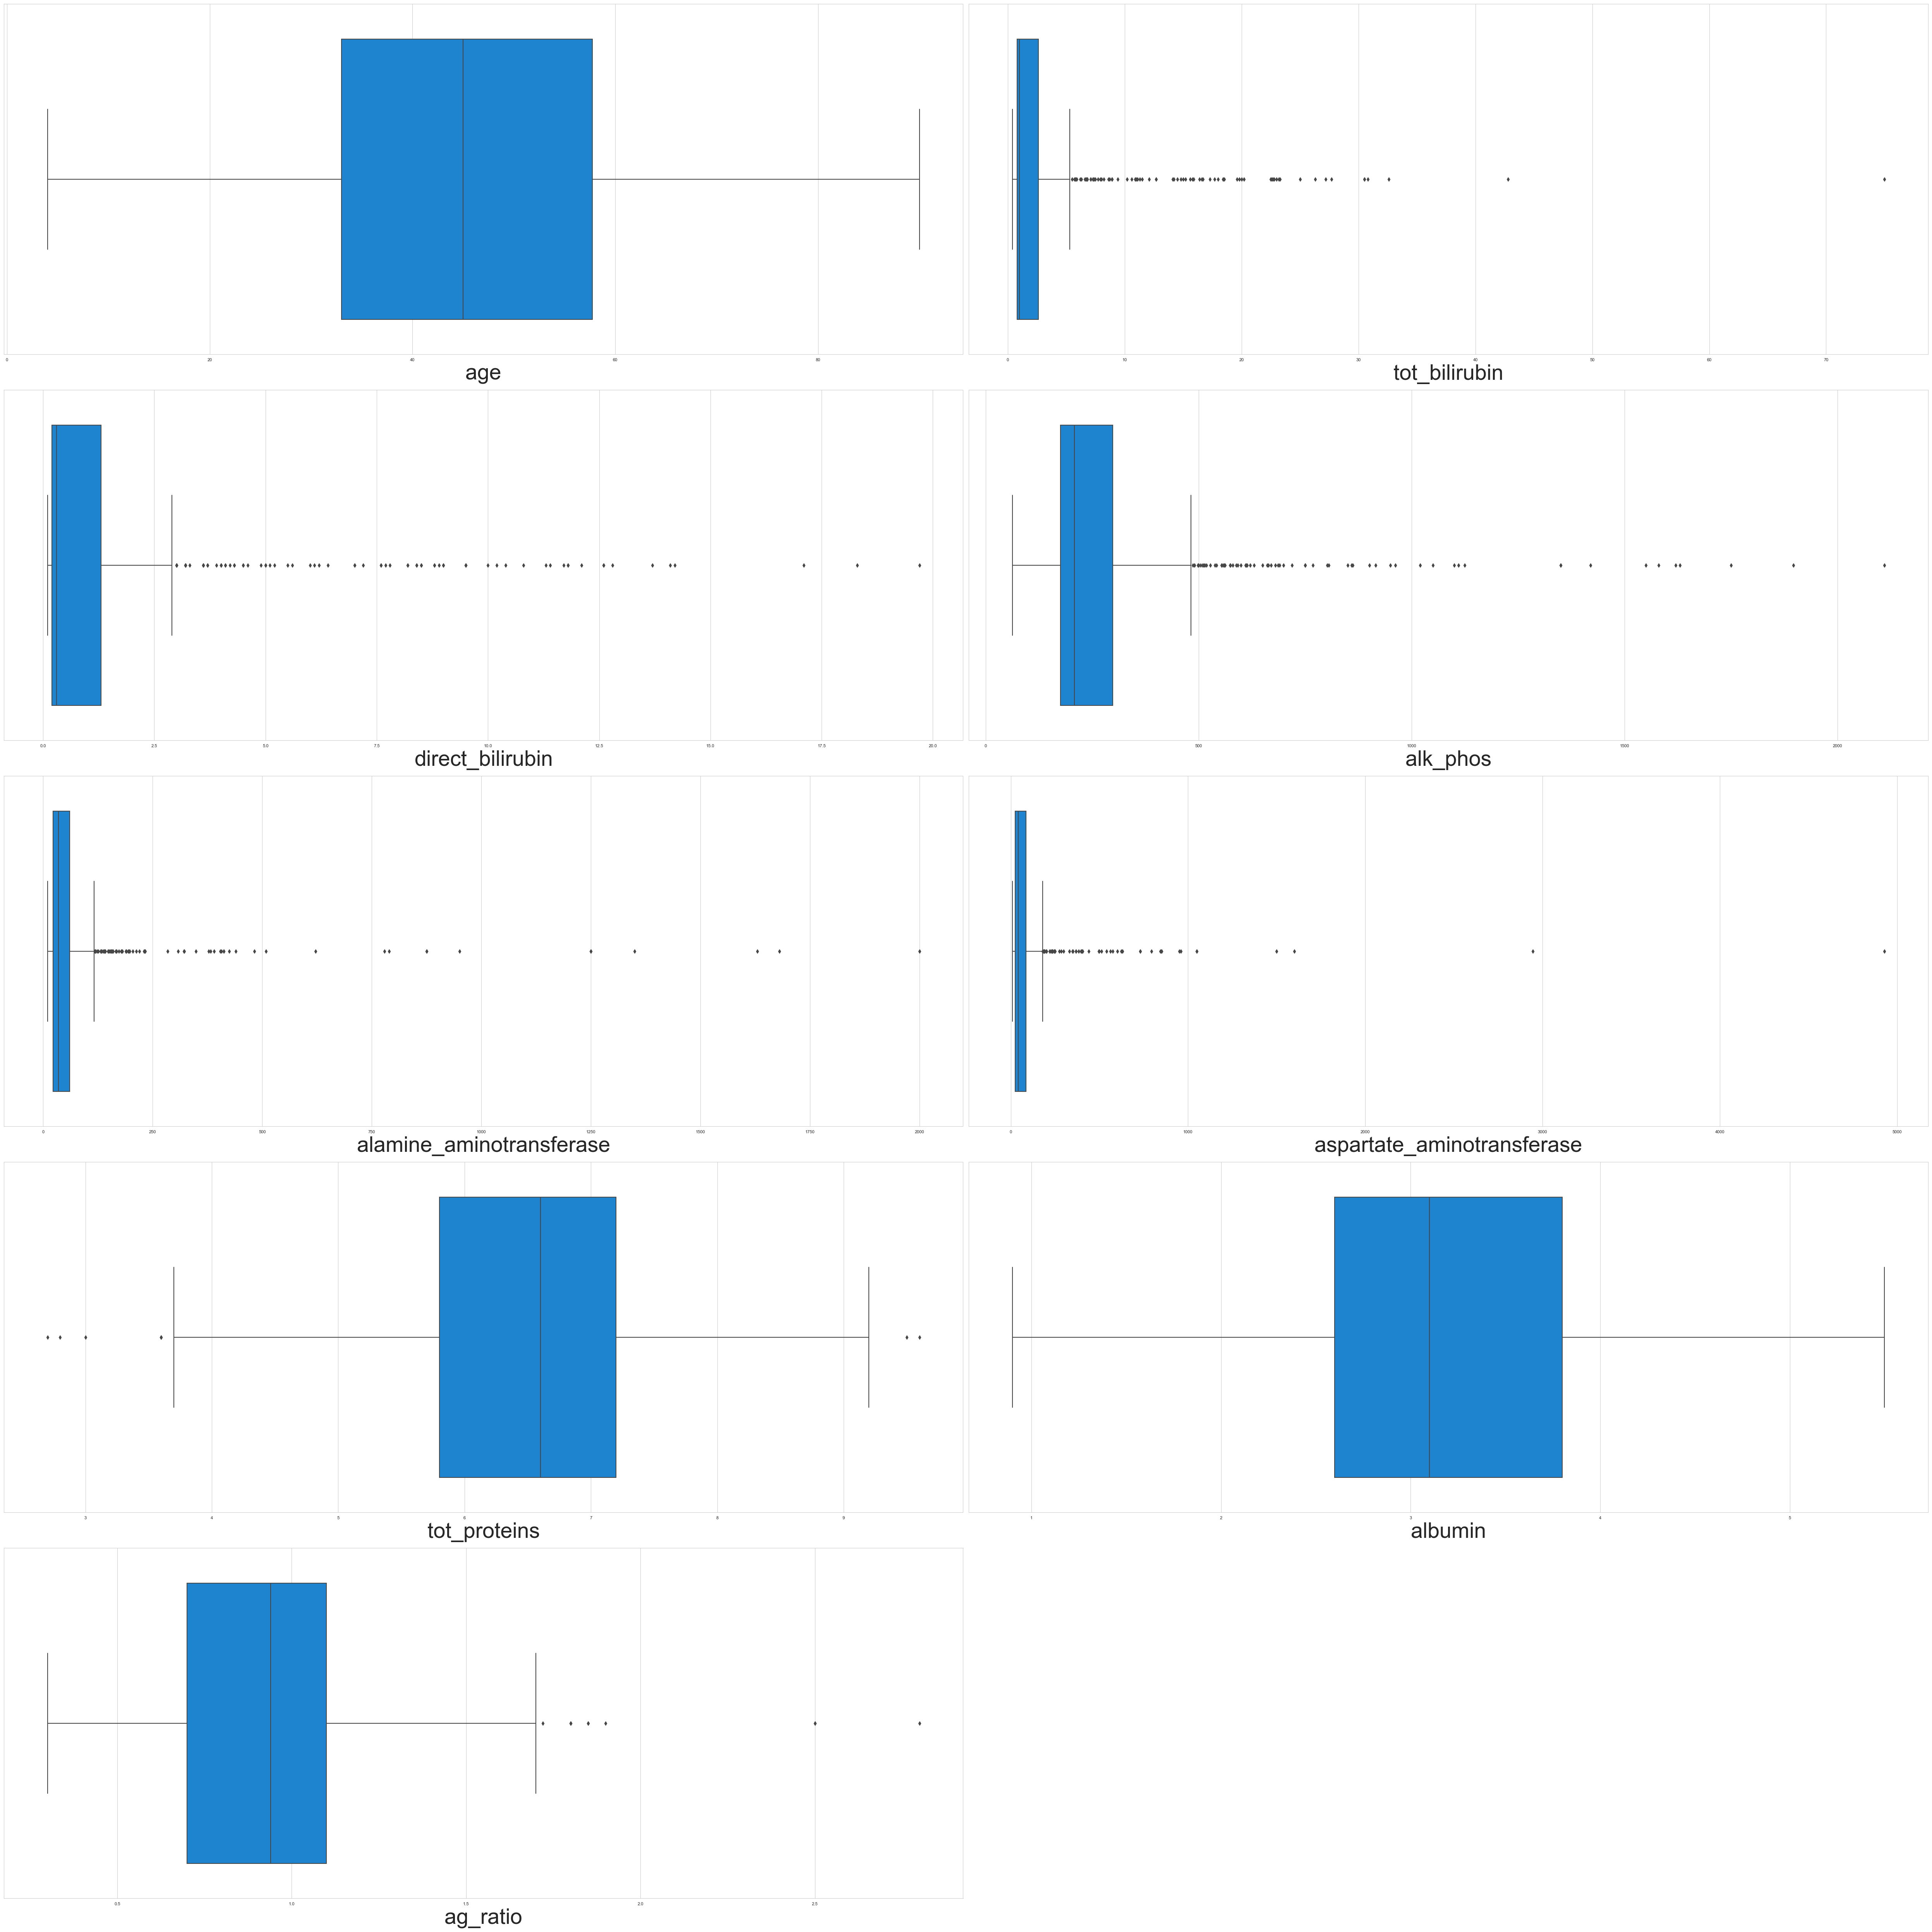

In [186]:
plt.figure(figsize=(50,50))
plot_number=1

for column in data.drop('gender',axis=1):
    if plot_number<=9:
        ax=plt.subplot(5,2,plot_number)
        sns.boxplot(x=data[column])
        plt.xlabel(column,Fontsize='40')
    plot_number+=1
plt.tight_layout()

In [187]:
#!pip install plotly

In [188]:
#As we can see total protiens and ag_ratio has some outliers 

#### i.Total protiens

In [189]:
import plotly.express as px

In [190]:
fig=px.histogram(data,x='tot_proteins',marginal='box')
fig.show()

In [191]:
#since the data is normally distributed we can use 3 sigma rule
lower_limit=data['tot_proteins'].mean() - 3 * data['tot_proteins'].std()
upper_limit=data['tot_proteins'].mean() + 3 * data['tot_proteins'].std()

In [192]:
print(lower_limit,upper_limit)

3.2237293707294623 9.741562725490475


In [193]:
data.loc[data['tot_proteins']<lower_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
179,75,1,2.8,1.3,250,23,29,2.7,0.9,0.5,1
180,75,1,2.9,1.3,218,33,37,3.0,1.5,1.0,1
268,26,1,0.6,0.1,110,15,20,2.8,1.6,1.3,1


In [194]:
data.loc[data['tot_proteins']<lower_limit,'tot_proteins']=data['tot_proteins'].mean()

In [195]:
data.loc[data['tot_proteins']<lower_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target


In [196]:
data.loc[data['tot_proteins']>upper_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target


#### ii.ag_ratio

In [197]:
fig=px.histogram(data,x='ag_ratio',marginal='box')
fig.show()

In [198]:
lower_limit=data['ag_ratio'].mean() - 3 * data['ag_ratio'].std()
upper_limit=data['ag_ratio'].mean() + 3 * data['ag_ratio'].std()

In [199]:
print(lower_limit,upper_limit)

-0.009185244969173278 1.9033776848317165


In [200]:
data.loc[data['ag_ratio']<lower_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target


In [201]:
data.loc[data['ag_ratio']>upper_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
547,42,1,11.1,6.1,214,60,186,6.9,2.8,2.8,1
571,32,1,15.6,9.5,134,54,125,5.6,4.0,2.5,1
574,32,1,25.0,13.7,560,41,88,7.9,2.5,2.5,1


In [202]:
data.loc[data['ag_ratio']>upper_limit,'ag_ratio']=data['ag_ratio'].mean()

In [203]:
data.loc[data['ag_ratio']>upper_limit]

,age,gender,tot_bilirubin,direct_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target


In [204]:
#checking for correlation

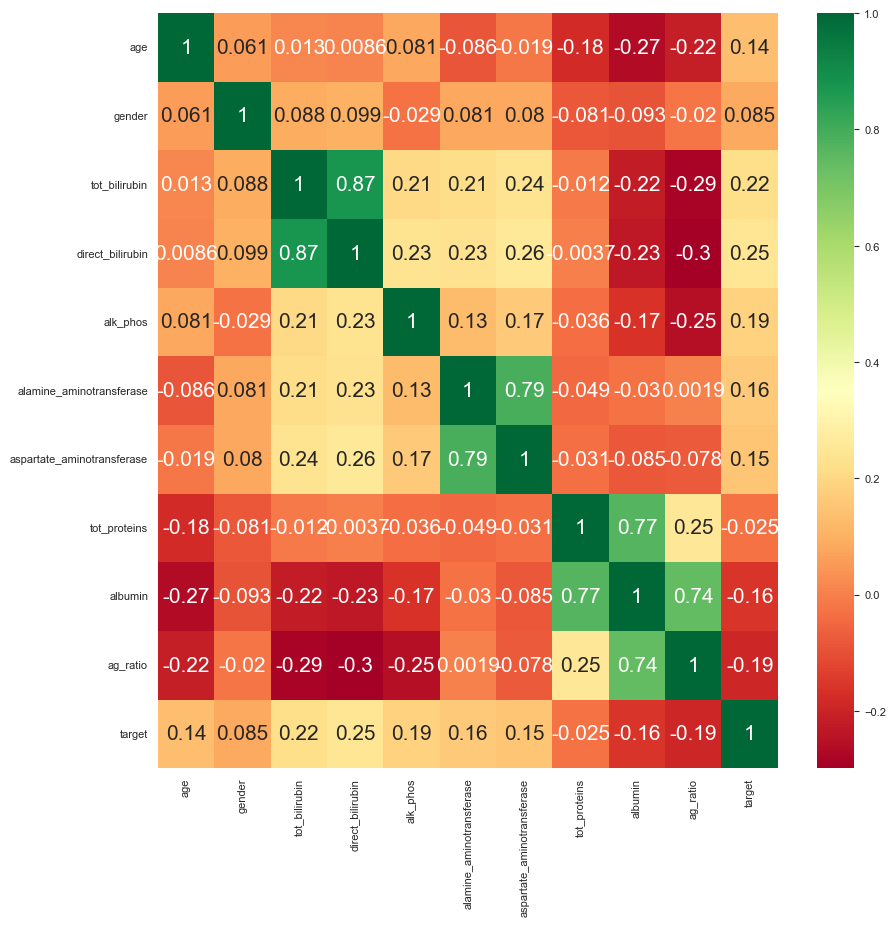

In [205]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15});

In [206]:
data.drop('direct_bilirubin',axis=1,inplace=True)

In [207]:
data

,age,gender,tot_bilirubin,alk_phos,alamine_aminotransferase,aspartate_aminotransferase,tot_proteins,albumin,ag_ratio,target
0,62,1,10.9,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,182,14,20,6.8,3.4,1.00,1
3,72,1,3.9,195,27,59,7.3,2.4,0.40,1
4,46,1,1.8,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...
577,60,1,0.5,500,20,34,5.9,1.6,0.37,0
578,40,1,0.6,98,35,31,6.0,3.2,1.10,1
579,52,1,0.8,245,48,49,6.4,3.2,1.00,1
580,31,1,1.3,184,29,32,6.8,3.4,1.00,1


Before balancing the data its better to take out the test data

In [208]:
X=data.drop('target',axis=1)
y=data['target']

In [209]:
from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X=scaler.fit_transform(X)

In [210]:
from sklearn.model_selection import train_test_split
X_t,X_test,y_t,y_test=train_test_split(X,y,test_size=0.25,random_state=19)

In [211]:
len(y_test)

146

#### iv.Balancing the data

In [212]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

In [213]:
smote=SMOTE()

In [214]:
X_sm,y_sm=smote.fit_resample(X_t,y_t)

In [215]:
print(Counter(y_t))
print(Counter(y_sm))

Counter({1: 309, 0: 127})
Counter({1: 309, 0: 309})


#### v.Splitting the data

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_sm,y_sm,random_state=19)

### 5.Model Building

* Trying out some models

In [217]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve

In [218]:
#lets create a function to train,predict and evaluate a model
def train_model(model,X_train,y_train,X_val,y_val):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_preds=model.predict(X_val)
    print(f'training accuracy is: {accuracy_score(y_train,y_train_pred)}')
    print(f"val_accuracy_score is: {accuracy_score(y_val,y_preds)}")
    print(f"precision_score is: {precision_score(y_val,y_preds)}")
    print(f"recall_score is: {recall_score(y_val,y_preds)}")
    return confusion_matrix(y_val,y_preds,labels=[0,1])
    


In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [220]:
log_clf=LogisticRegression()
random_clf=RandomForestClassifier()
svc_clf=SVC()
DT_clf=DecisionTreeClassifier()
xgb_clf=XGBClassifier(learning_rate=0.0001,n_estimators=4522,random_state=19)

In [221]:
train_model(log_clf,X_train,y_train,X_val,y_val)

training accuracy is: 0.7105831533477321
val_accuracy_score is: 0.7225806451612903
precision_score is: 0.7777777777777778
recall_score is: 0.6282051282051282


array([[63, 14],
       [29, 49]], dtype=int64)

In [222]:
train_model(svc_clf,X_train,y_train,X_val,y_val)

training accuracy is: 0.6673866090712743
val_accuracy_score is: 0.6967741935483871
precision_score is: 0.8297872340425532
recall_score is: 0.5


array([[69,  8],
       [39, 39]], dtype=int64)

In [223]:
train_model(DT_clf,X_train,y_train,X_val,y_val)

training accuracy is: 1.0
val_accuracy_score is: 0.7548387096774194
precision_score is: 0.7564102564102564
recall_score is: 0.7564102564102564


array([[58, 19],
       [19, 59]], dtype=int64)

In [224]:
train_model(random_clf,X_train,y_train,X_val,y_val)

training accuracy is: 1.0
val_accuracy_score is: 0.8193548387096774
precision_score is: 0.8571428571428571
recall_score is: 0.7692307692307693


array([[67, 10],
       [18, 60]], dtype=int64)

In [225]:
train_model(xgb_clf,X_train,y_train,X_val,y_val)

[22:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
training accuracy is: 0.8833693304535637
val_accuracy_score is: 0.7354838709677419
precision_score is: 0.7846153846153846
recall_score is: 0.6538461538461539


array([[63, 14],
       [27, 51]], dtype=int64)

as we can see RandomForest is producing better results than other models

In [226]:
#Cross validating the model
from sklearn.model_selection import cross_val_score

In [227]:
cross_val_score(random_clf,X_train,y_train,cv=5)

array([0.7311828 , 0.84946237, 0.79569892, 0.83695652, 0.7173913 ])

#### Hyperparameter Tuning

In [228]:
from sklearn.model_selection import RandomizedSearchCV

In [229]:
random_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [276]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]  
max_features = ['log2', 'sqrt']                                 
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4,8,10]
bootstrap = [True, False] 

#dictionary for hyperparameters
params = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [277]:
rcv= RandomizedSearchCV(random_clf, scoring='recall',param_distributions=params,cv=3,
                                n_jobs=-1,verbose=3,n_iter=100,random_state=19)

training the model on full dataset 

In [278]:
rcv.fit(X_sm,y_sm)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=19, scoring='recall', verbose=3)

In [279]:

rcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': False}

In [280]:
random_clf2=RandomForestClassifier(n_estimators=2688,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=130,bootstrap=False,random_state=19)

In [281]:
random_clf2.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=False, max_depth=130, max_features='sqrt',
                       n_estimators=2688, random_state=19)

In [282]:
y_test_pred=random_clf2.predict(X_test)

## Evaluation

In [283]:
accuracy_score(y_test,y_test_pred)

0.678082191780822

* In this case,recall score is more important because it is acceptable if the model predicts a non liver disease patient as liver disease patient anyway once the actual test is done,actual result will be known
* But if a liver disease patient is predicted as non liver disease,there will be chances that he will not undergo a test
* Hence recall score is more important in this case

In [284]:
precision_score(y_test,y_test_pred)

0.780952380952381

In [285]:
confusion_matrix(y_test,y_test_pred)

array([[17, 23],
       [24, 82]], dtype=int64)

as we can see out of 105 patients which are classified as patients with liver disease patient,78% of them are actually patients with liver disease i.e approximately 82 patients

In [295]:
recall_score(y_test,y_test_pred)

0.7735849056603774

In [296]:
confusion_matrix(y_test,y_test_pred)

array([[17, 23],
       [24, 82]], dtype=int64)

out of 106 patients who are actually liver disease patients,77% of those i.e approximately 82 are correctly classified as liver patients by the model 

In [297]:
confusion_matrix(y_test,y_test_pred)

array([[17, 23],
       [24, 82]], dtype=int64)

In [298]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.41      0.42      0.42        40
           1       0.78      0.77      0.78       106

    accuracy                           0.68       146
   macro avg       0.60      0.60      0.60       146
weighted avg       0.68      0.68      0.68       146



In [299]:
probs=random_clf2.predict_proba(X_test)[:,1]

In [300]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

In [301]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

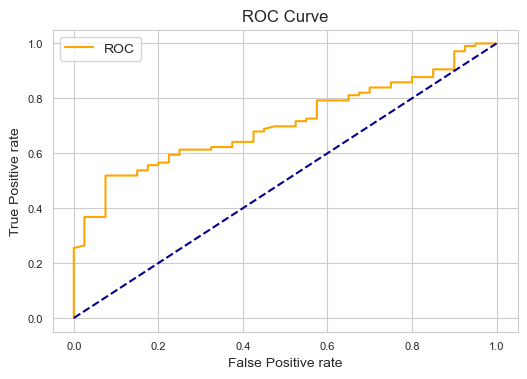

In [302]:
plot_roc_curve(fpr,tpr)